# Imports

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4afa4b7d5ed25de765ee2e2b427ba15fcfb9c28262505225443b495e29860aa0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip install calmap

In [4]:

### importamos librerías

'''
instalar:
- plotly
- calmap
- folium
- wget
'''

#analisis
import pandas as pd 
import numpy as np

#visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import calmap
import folium

#paletas
confirmados='#393e46'
fallecidos='#ff2e63'

import wget
import os

# Data Loading

In [6]:

def read_FAO(fileName):
	import requests 
	file_url = "https://fenixservices.fao.org/faostat/static/bulkdownloads/"+fileName+".zip"
		
	r = requests.get(file_url, stream = True) 

	with open("temporalFile.zip", "wb") as file: 
		for block in r.iter_content(chunk_size = 1024): 
			if block: 
				file.write(block) 
		
	!unzip temporalFile.zip 

	Database = fileName + ".csv"	
	df = pd.read_csv(Database, encoding = "ISO-8859-1")

	return df




In [7]:

df_food_balances = read_FAO("FoodBalanceSheets_E_All_Data_(Normalized)")

df_emissions = read_FAO("Environment_Emissions_by_Sector_E_All_Data_(Normalized)")

df_food_transport = read_FAO("Environment_Transport_E_All_Data_(Normalized)")

df_waste_disposal = read_FAO("Emissions_Agriculture_Waste_Disposal_E_All_Data_(Normalized)")




Archive:  temporalFile.zip
  inflating: FoodBalanceSheets_E_All_Data_(Normalized).csv  
  inflating: FoodBalanceSheets_E_Flags.csv  
Archive:  temporalFile.zip
  inflating: Environment_Emissions_by_Sector_E_All_Data_(Normalized).csv  
  inflating: Environment_Emissions_by_Sector_E_Flags.csv  
Archive:  temporalFile.zip
  inflating: Environment_Transport_E_All_Data_(Normalized).csv  
 extracting: Environment_Transport_E_Flags.csv  
Archive:  temporalFile.zip
  inflating: Emissions_Agriculture_Waste_Disposal_E_All_Data_(Normalized).csv  
  inflating: Emissions_Agriculture_Waste_Disposal_E_Flags.csv  


In [67]:
display(df_food_balances.head(2).T)
df_food_balances["MeasuredItem"]= df_food_balances["Item"] + "-"+ df_food_balances["Element"]
display(df_food_balances.groupby("Unit").count())



display(df_food_balances.groupby("MeasuredItem").sum().reset_index().columns)

display(df_food_balances[df_food_balances["Unit"]=="1000 tonnes"])




,0,1
Area Code,2,2
Area,Afghanistan,Afghanistan
Item Code,2501,2501
Item,Population,Population
Element Code,511,511
Element,Total Population - Both sexes,Total Population - Both sexes
Year Code,2010,2011
Year,2010,2011
Unit,1000 persons,1000 persons
Value,29186.0,30117.0


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Value,Flag,MeasuredItem
Unit,,,,,,,,,,,
1000 persons,2134,2134,2134,2134,2134,2134,2134,2134,2134,2134,2134
1000 tonnes,2048212,2048212,2048212,2048212,2048212,2048212,2048212,2048212,1984659,2048212,2048212
g/capita/day,465255,465255,465255,465255,465255,465255,465255,465255,465255,465255,465255
kcal/capita/day,232318,232318,232318,232318,232318,232318,232318,232318,232318,232318,232318
kg,227378,227378,227378,227378,227378,227378,227378,227378,227378,227378,227378


Index(['MeasuredItem', 'Area Code', 'Item Code', 'Element Code', 'Year Code',
       'Year', 'Value'],
      dtype='object')

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,MeasuredItem
10,2,Afghanistan,2501,Population,5301,Domestic supply quantity,2010,2010,1000 tonnes,0.0,S,Population-Domestic supply quantity
11,2,Afghanistan,2501,Population,5301,Domestic supply quantity,2011,2011,1000 tonnes,0.0,S,Population-Domestic supply quantity
12,2,Afghanistan,2501,Population,5301,Domestic supply quantity,2012,2012,1000 tonnes,0.0,S,Population-Domestic supply quantity
13,2,Afghanistan,2501,Population,5301,Domestic supply quantity,2013,2013,1000 tonnes,0.0,S,Population-Domestic supply quantity
14,2,Afghanistan,2501,Population,5301,Domestic supply quantity,2014,2014,1000 tonnes,0.0,S,Population-Domestic supply quantity
...,...,...,...,...,...,...,...,...,...,...,...,...
2975252,5817,Net Food Importing Developing Countries,2899,Miscellaneous,5142,Food,2015,2015,1000 tonnes,992.0,A,Miscellaneous-Food
2975253,5817,Net Food Importing Developing Countries,2899,Miscellaneous,5142,Food,2016,2016,1000 tonnes,1032.0,A,Miscellaneous-Food
2975254,5817,Net Food Importing Developing Countries,2899,Miscellaneous,5142,Food,2017,2017,1000 tonnes,1066.0,A,Miscellaneous-Food
2975255,5817,Net Food Importing Developing Countries,2899,Miscellaneous,5142,Food,2018,2018,1000 tonnes,1140.0,A,Miscellaneous-Food


area_measure_item,"Afghanistan-Alcohol, Non-Food-Domestic supply quantity","Afghanistan-Alcohol, Non-Food-Export Quantity","Afghanistan-Alcohol, Non-Food-Import Quantity","Afghanistan-Alcohol, Non-Food-Production","Afghanistan-Alcohol, Non-Food-Residuals",Afghanistan-Alcoholic Beverages-Domestic supply quantity,Afghanistan-Alcoholic Beverages-Export Quantity,Afghanistan-Alcoholic Beverages-Feed,Afghanistan-Alcoholic Beverages-Food,Afghanistan-Alcoholic Beverages-Import Quantity,...,Zimbabwe-Wheat and products-Seed,Zimbabwe-Wheat and products-Stock Variation,Zimbabwe-Wine-Domestic supply quantity,Zimbabwe-Wine-Export Quantity,Zimbabwe-Wine-Food,Zimbabwe-Wine-Import Quantity,Zimbabwe-Wine-Production,Zimbabwe-Wine-Residuals,Zimbabwe-Wine-Stock Variation,Zimbabwe-Yams-Domestic supply quantity
Year,,,,,,,,,,,,,,,,,,,,,
2010,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2011,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2014,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2015,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2016,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2017,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2018,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


39607

39607

,Year,Value
area_measure_item,,
Afghanistan-Barley and products-Export Quantity,2016.500000,0.833333
Afghanistan-Beans-Export Quantity,2016.500000,33.000000
Afghanistan-Beans-Feed,2017.500000,0.500000
Afghanistan-Beans-Food,2016.500000,0.500000
Afghanistan-Beans-Import Quantity,2016.500000,20.166667
...,...,...
Zimbabwe-Onions-Import Quantity,2014.125000,2.875000
Zimbabwe-Potatoes and products-Export Quantity,2014.000000,0.375000
Zimbabwe-Sesame seed-Export Quantity,2014.555556,0.222222


,Year,Value,area_measure_item
9268,2014,0.0,"Afghanistan-Alcohol, Non-Food-Export Quantity"
9269,2015,0.0,"Afghanistan-Alcohol, Non-Food-Export Quantity"
9270,2016,0.0,"Afghanistan-Alcohol, Non-Food-Export Quantity"
9271,2017,0.0,"Afghanistan-Alcohol, Non-Food-Export Quantity"
9272,2018,0.0,"Afghanistan-Alcohol, Non-Food-Export Quantity"
9273,2019,0.0,"Afghanistan-Alcohol, Non-Food-Export Quantity"


,Year,Value,area_measure_item
9262,2014,0.0,"Afghanistan-Alcohol, Non-Food-Import Quantity"
9263,2015,0.0,"Afghanistan-Alcohol, Non-Food-Import Quantity"
9264,2016,0.0,"Afghanistan-Alcohol, Non-Food-Import Quantity"
9265,2017,0.0,"Afghanistan-Alcohol, Non-Food-Import Quantity"
9266,2018,0.0,"Afghanistan-Alcohol, Non-Food-Import Quantity"
9267,2019,0.0,"Afghanistan-Alcohol, Non-Food-Import Quantity"


,Year,Value,area_measure_item
9258,2010,0.0,"Afghanistan-Alcohol, Non-Food-Production"
9259,2011,0.0,"Afghanistan-Alcohol, Non-Food-Production"
9260,2012,0.0,"Afghanistan-Alcohol, Non-Food-Production"
9261,2013,0.0,"Afghanistan-Alcohol, Non-Food-Production"


,Year,Value,area_measure_item
8798,2010,NaN,Afghanistan-Alcoholic Beverages-Feed
8799,2011,NaN,Afghanistan-Alcoholic Beverages-Feed
8800,2012,NaN,Afghanistan-Alcoholic Beverages-Feed
8801,2013,NaN,Afghanistan-Alcoholic Beverages-Feed
8802,2014,NaN,Afghanistan-Alcoholic Beverages-Feed
8803,2015,NaN,Afghanistan-Alcoholic Beverages-Feed
8804,2016,NaN,Afghanistan-Alcoholic Beverages-Feed


,Year,Value,area_measure_item
8812,2010,NaN,Afghanistan-Alcoholic Beverages-Losses
8813,2011,NaN,Afghanistan-Alcoholic Beverages-Losses
8814,2012,NaN,Afghanistan-Alcoholic Beverages-Losses
8815,2013,NaN,Afghanistan-Alcoholic Beverages-Losses
8816,2014,NaN,Afghanistan-Alcoholic Beverages-Losses
8817,2015,NaN,Afghanistan-Alcoholic Beverages-Losses
8818,2016,NaN,Afghanistan-Alcoholic Beverages-Losses


,Year,Value,area_measure_item
8828,2010,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...
8829,2011,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...
8830,2012,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...
8831,2013,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...
8832,2014,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...
8833,2015,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...
8834,2016,NaN,Afghanistan-Alcoholic Beverages-Other uses (no...


,Year,Value,area_measure_item
8819,2010,0.0,Afghanistan-Alcoholic Beverages-Processing
8820,2011,0.0,Afghanistan-Alcoholic Beverages-Processing
8821,2012,0.0,Afghanistan-Alcoholic Beverages-Processing
8822,2013,0.0,Afghanistan-Alcoholic Beverages-Processing
8823,2014,NaN,Afghanistan-Alcoholic Beverages-Processing
8824,2015,NaN,Afghanistan-Alcoholic Beverages-Processing
8825,2016,NaN,Afghanistan-Alcoholic Beverages-Processing
8826,2017,NaN,Afghanistan-Alcoholic Beverages-Processing
8827,2018,NaN,Afghanistan-Alcoholic Beverages-Processing


,Year,Value,area_measure_item
8749,2010,0.0,Afghanistan-Alcoholic Beverages-Production
8750,2011,0.0,Afghanistan-Alcoholic Beverages-Production
8751,2012,0.0,Afghanistan-Alcoholic Beverages-Production
8752,2013,0.0,Afghanistan-Alcoholic Beverages-Production
8753,2014,NaN,Afghanistan-Alcoholic Beverages-Production
8754,2015,NaN,Afghanistan-Alcoholic Beverages-Production
8755,2016,NaN,Afghanistan-Alcoholic Beverages-Production
8756,2017,NaN,Afghanistan-Alcoholic Beverages-Production
8757,2018,NaN,Afghanistan-Alcoholic Beverages-Production


,Year,Value,area_measure_item
8805,2010,NaN,Afghanistan-Alcoholic Beverages-Seed
8806,2011,NaN,Afghanistan-Alcoholic Beverages-Seed
8807,2012,NaN,Afghanistan-Alcoholic Beverages-Seed
8808,2013,NaN,Afghanistan-Alcoholic Beverages-Seed
8809,2014,NaN,Afghanistan-Alcoholic Beverages-Seed
8810,2015,NaN,Afghanistan-Alcoholic Beverages-Seed
8811,2016,NaN,Afghanistan-Alcoholic Beverages-Seed


,Year,Value,area_measure_item
8835,2010,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...
8836,2011,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...
8837,2012,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...
8838,2013,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...
8839,2014,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...
8840,2015,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...
8841,2016,NaN,Afghanistan-Alcoholic Beverages-Tourist consum...


,Year,Value,area_measure_item
10241,2010,NaN,Afghanistan-Animal fats-Feed
10242,2011,NaN,Afghanistan-Animal fats-Feed
10243,2012,NaN,Afghanistan-Animal fats-Feed
10244,2013,NaN,Afghanistan-Animal fats-Feed
10245,2014,0.0,Afghanistan-Animal fats-Feed
10246,2015,NaN,Afghanistan-Animal fats-Feed
10247,2016,0.0,Afghanistan-Animal fats-Feed
10248,2018,0.0,Afghanistan-Animal fats-Feed
10249,2019,0.0,Afghanistan-Animal fats-Feed


,Year,Value,area_measure_item
10276,2010,0.0,Afghanistan-Animal fats-Other uses (non-food)
10277,2011,0.0,Afghanistan-Animal fats-Other uses (non-food)
10278,2012,0.0,Afghanistan-Animal fats-Other uses (non-food)
10279,2013,0.0,Afghanistan-Animal fats-Other uses (non-food)
10280,2014,NaN,Afghanistan-Animal fats-Other uses (non-food)
10281,2015,NaN,Afghanistan-Animal fats-Other uses (non-food)
10282,2016,NaN,Afghanistan-Animal fats-Other uses (non-food)
10283,2019,0.0,Afghanistan-Animal fats-Other uses (non-food)


,Year,Value,area_measure_item
10267,2010,0.0,Afghanistan-Animal fats-Processing
10268,2011,0.0,Afghanistan-Animal fats-Processing
10269,2012,0.0,Afghanistan-Animal fats-Processing
10270,2013,0.0,Afghanistan-Animal fats-Processing
10271,2014,NaN,Afghanistan-Animal fats-Processing
10272,2015,NaN,Afghanistan-Animal fats-Processing
10273,2016,NaN,Afghanistan-Animal fats-Processing
10274,2017,NaN,Afghanistan-Animal fats-Processing
10275,2018,NaN,Afghanistan-Animal fats-Processing


,Year,Value,area_measure_item
10250,2010,NaN,Afghanistan-Animal fats-Seed
10251,2011,NaN,Afghanistan-Animal fats-Seed
10252,2012,NaN,Afghanistan-Animal fats-Seed
10253,2013,NaN,Afghanistan-Animal fats-Seed
10254,2014,NaN,Afghanistan-Animal fats-Seed
10255,2015,NaN,Afghanistan-Animal fats-Seed
10256,2016,NaN,Afghanistan-Animal fats-Seed


,Year,Value,area_measure_item
10284,2010,NaN,Afghanistan-Animal fats-Tourist consumption
10285,2011,NaN,Afghanistan-Animal fats-Tourist consumption
10286,2012,NaN,Afghanistan-Animal fats-Tourist consumption
10287,2013,NaN,Afghanistan-Animal fats-Tourist consumption
10288,2014,NaN,Afghanistan-Animal fats-Tourist consumption
10289,2015,NaN,Afghanistan-Animal fats-Tourist consumption
10290,2016,NaN,Afghanistan-Animal fats-Tourist consumption


,Year,Value,area_measure_item
7277,2010,0.0,Afghanistan-Apples and products-Processing
7278,2011,0.0,Afghanistan-Apples and products-Processing
7279,2012,0.0,Afghanistan-Apples and products-Processing
7280,2013,0.0,Afghanistan-Apples and products-Processing


,Year,Value,area_measure_item
7088,2010,0.0,Afghanistan-Bananas-Processing
7089,2011,0.0,Afghanistan-Bananas-Processing
7090,2012,0.0,Afghanistan-Bananas-Processing
7091,2013,0.0,Afghanistan-Bananas-Processing


,Year,Value,area_measure_item
7044,2010,0.0,Afghanistan-Bananas-Production
7045,2011,0.0,Afghanistan-Bananas-Production
7046,2012,0.0,Afghanistan-Bananas-Production
7047,2013,0.0,Afghanistan-Bananas-Production


,Year,Value,area_measure_item
586,2014,0.0,Afghanistan-Barley and products-Export Quantity
587,2015,0.0,Afghanistan-Barley and products-Export Quantity
588,2016,0.0,Afghanistan-Barley and products-Export Quantity
589,2017,0.0,Afghanistan-Barley and products-Export Quantity
590,2018,2.0,Afghanistan-Barley and products-Export Quantity
591,2019,3.0,Afghanistan-Barley and products-Export Quantity


,Year,Value,area_measure_item
632,2010,0.0,Afghanistan-Barley and products-Processing
633,2011,0.0,Afghanistan-Barley and products-Processing
634,2012,0.0,Afghanistan-Barley and products-Processing
635,2013,0.0,Afghanistan-Barley and products-Processing


,Year,Value,area_measure_item
2818,2014,10.0,Afghanistan-Beans-Export Quantity
2819,2015,16.0,Afghanistan-Beans-Export Quantity
2820,2016,16.0,Afghanistan-Beans-Export Quantity
2821,2017,36.0,Afghanistan-Beans-Export Quantity
2822,2018,54.0,Afghanistan-Beans-Export Quantity
2823,2019,66.0,Afghanistan-Beans-Export Quantity


,Year,Value,area_measure_item
2834,2017,1.0,Afghanistan-Beans-Feed
2835,2018,0.0,Afghanistan-Beans-Feed


,Year,Value,area_measure_item
2850,2014,0.0,Afghanistan-Beans-Food
2851,2015,0.0,Afghanistan-Beans-Food
2852,2016,0.0,Afghanistan-Beans-Food
2853,2017,3.0,Afghanistan-Beans-Food
2854,2018,0.0,Afghanistan-Beans-Food
2855,2019,0.0,Afghanistan-Beans-Food


,Year,Value,area_measure_item
2812,2014,0.0,Afghanistan-Beans-Import Quantity
2813,2015,0.0,Afghanistan-Beans-Import Quantity
2814,2016,0.0,Afghanistan-Beans-Import Quantity
2815,2017,40.0,Afghanistan-Beans-Import Quantity
2816,2018,48.0,Afghanistan-Beans-Import Quantity
2817,2019,33.0,Afghanistan-Beans-Import Quantity


,Year,Value,area_measure_item
2836,2010,0.0,Afghanistan-Beans-Processing
2837,2011,0.0,Afghanistan-Beans-Processing
2838,2012,0.0,Afghanistan-Beans-Processing
2839,2013,0.0,Afghanistan-Beans-Processing


,Year,Value,area_measure_item
2808,2010,0.0,Afghanistan-Beans-Production
2809,2011,0.0,Afghanistan-Beans-Production
2810,2012,0.0,Afghanistan-Beans-Production
2811,2013,0.0,Afghanistan-Beans-Production


,Year,Value,area_measure_item
9025,2015,0.0,Afghanistan-Beer-Export Quantity
9026,2018,0.0,Afghanistan-Beer-Export Quantity


,Year,Value,area_measure_item
9010,2010,3.0,Afghanistan-Beer-Import Quantity
9011,2011,3.0,Afghanistan-Beer-Import Quantity
9012,2012,3.0,Afghanistan-Beer-Import Quantity
9013,2013,3.0,Afghanistan-Beer-Import Quantity
9014,2019,1.0,Afghanistan-Beer-Import Quantity


,Year,Value,area_measure_item
9006,2010,0.0,Afghanistan-Beer-Production
9007,2011,0.0,Afghanistan-Beer-Production
9008,2012,0.0,Afghanistan-Beer-Production
9009,2013,0.0,Afghanistan-Beer-Production


,Year,Value,area_measure_item
9182,2014,0.0,"Afghanistan-Beverages, Alcoholic-Export Quantity"
9183,2015,0.0,"Afghanistan-Beverages, Alcoholic-Export Quantity"
9184,2016,0.0,"Afghanistan-Beverages, Alcoholic-Export Quantity"
9185,2017,0.0,"Afghanistan-Beverages, Alcoholic-Export Quantity"
9186,2018,0.0,"Afghanistan-Beverages, Alcoholic-Export Quantity"
9187,2019,0.0,"Afghanistan-Beverages, Alcoholic-Export Quantity"


,Year,Value,area_measure_item
9158,2010,0.0,"Afghanistan-Beverages, Alcoholic-Production"
9159,2011,0.0,"Afghanistan-Beverages, Alcoholic-Production"
9160,2012,0.0,"Afghanistan-Beverages, Alcoholic-Production"
9161,2013,0.0,"Afghanistan-Beverages, Alcoholic-Production"


,Year,Value,area_measure_item
9107,2017,0.0,"Afghanistan-Beverages, Fermented-Export Quantity"


,Year,Value,area_measure_item
9128,2014,0.0,"Afghanistan-Beverages, Fermented-Food"
9129,2015,0.0,"Afghanistan-Beverages, Fermented-Food"
9130,2016,30.0,"Afghanistan-Beverages, Fermented-Food"
9131,2017,0.0,"Afghanistan-Beverages, Fermented-Food"
9132,2018,0.0,"Afghanistan-Beverages, Fermented-Food"
9133,2019,0.0,"Afghanistan-Beverages, Fermented-Food"


,Year,Value,area_measure_item
9101,2014,0.0,"Afghanistan-Beverages, Fermented-Import Quantity"
9102,2015,0.0,"Afghanistan-Beverages, Fermented-Import Quantity"
9103,2016,30.0,"Afghanistan-Beverages, Fermented-Import Quantity"
9104,2017,0.0,"Afghanistan-Beverages, Fermented-Import Quantity"
9105,2018,0.0,"Afghanistan-Beverages, Fermented-Import Quantity"
9106,2019,0.0,"Afghanistan-Beverages, Fermented-Import Quantity"


,Year,Value,area_measure_item
9097,2010,0.0,"Afghanistan-Beverages, Fermented-Production"
9098,2011,0.0,"Afghanistan-Beverages, Fermented-Production"
9099,2012,0.0,"Afghanistan-Beverages, Fermented-Production"
9100,2013,0.0,"Afghanistan-Beverages, Fermented-Production"


,Year,Value,area_measure_item
9479,2014,0.0,Afghanistan-Bovine Meat-Export Quantity
9480,2017,0.0,Afghanistan-Bovine Meat-Export Quantity
9481,2019,0.0,Afghanistan-Bovine Meat-Export Quantity


,Year,Value,area_measure_item
9492,2010,0.0,Afghanistan-Bovine Meat-Processing
9493,2011,0.0,Afghanistan-Bovine Meat-Processing
9494,2012,0.0,Afghanistan-Bovine Meat-Processing
9495,2013,0.0,Afghanistan-Bovine Meat-Processing


,Year,Value,area_measure_item
10371,2014,0.0,"Afghanistan-Butter, Ghee-Export Quantity"
10372,2019,0.0,"Afghanistan-Butter, Ghee-Export Quantity"


,Year,Value,area_measure_item
10383,2014,0.0,"Afghanistan-Butter, Ghee-Feed"
10384,2016,0.0,"Afghanistan-Butter, Ghee-Feed"
10385,2018,0.0,"Afghanistan-Butter, Ghee-Feed"
10386,2019,0.0,"Afghanistan-Butter, Ghee-Feed"


,Year,Value,area_measure_item
1450,2016,0.0,Afghanistan-Cassava and products-Export Quantity


,Year,Value,area_measure_item
1473,2014,0.0,Afghanistan-Cassava and products-Food
1474,2018,1.0,Afghanistan-Cassava and products-Food
1475,2019,0.0,Afghanistan-Cassava and products-Food


,Year,Value,area_measure_item
1447,2014,0.0,Afghanistan-Cassava and products-Import Quantity
1448,2018,1.0,Afghanistan-Cassava and products-Import Quantity
1449,2019,0.0,Afghanistan-Cassava and products-Import Quantity


,Year,Value,area_measure_item
1461,2010,0.0,Afghanistan-Cassava and products-Processing
1462,2011,0.0,Afghanistan-Cassava and products-Processing
1463,2012,0.0,Afghanistan-Cassava and products-Processing
1464,2013,0.0,Afghanistan-Cassava and products-Processing


,Year,Value,area_measure_item
1465,2010,0.0,Afghanistan-Cassava and products-Residuals
1466,2011,0.0,Afghanistan-Cassava and products-Residuals
1467,2012,0.0,Afghanistan-Cassava and products-Residuals
1468,2013,0.0,Afghanistan-Cassava and products-Residuals
1469,2014,0.0,Afghanistan-Cassava and products-Residuals
1470,2016,0.0,Afghanistan-Cassava and products-Residuals
1471,2018,0.0,Afghanistan-Cassava and products-Residuals
1472,2019,0.0,Afghanistan-Cassava and products-Residuals


,Year,Value,area_measure_item
190,2010,0.0,Afghanistan-Cereals - Excluding Beer-Processing
191,2011,0.0,Afghanistan-Cereals - Excluding Beer-Processing
192,2012,0.0,Afghanistan-Cereals - Excluding Beer-Processing
193,2013,4.0,Afghanistan-Cereals - Excluding Beer-Processing
194,2014,NaN,Afghanistan-Cereals - Excluding Beer-Processing
195,2015,NaN,Afghanistan-Cereals - Excluding Beer-Processing
196,2016,NaN,Afghanistan-Cereals - Excluding Beer-Processing
197,2017,NaN,Afghanistan-Cereals - Excluding Beer-Processing
198,2018,NaN,Afghanistan-Cereals - Excluding Beer-Processing


,Year,Value,area_measure_item
209,2010,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...
210,2011,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...
211,2012,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...
212,2013,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...
213,2014,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...
214,2015,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...
215,2016,NaN,Afghanistan-Cereals - Excluding Beer-Tourist c...


,Year,Value,area_measure_item
1200,2014,0.0,"Afghanistan-Cereals, Other-Export Quantity"
1201,2016,0.0,"Afghanistan-Cereals, Other-Export Quantity"
1202,2018,0.0,"Afghanistan-Cereals, Other-Export Quantity"
1203,2019,8.0,"Afghanistan-Cereals, Other-Export Quantity"


,Year,Value,area_measure_item
1214,2014,0.0,"Afghanistan-Cereals, Other-Feed"
1215,2015,0.0,"Afghanistan-Cereals, Other-Feed"
1216,2016,0.0,"Afghanistan-Cereals, Other-Feed"
1217,2017,0.0,"Afghanistan-Cereals, Other-Feed"
1218,2018,0.0,"Afghanistan-Cereals, Other-Feed"
1219,2019,0.0,"Afghanistan-Cereals, Other-Feed"


,Year,Value,area_measure_item
1220,2010,0.0,"Afghanistan-Cereals, Other-Processing"
1221,2011,0.0,"Afghanistan-Cereals, Other-Processing"
1222,2012,0.0,"Afghanistan-Cereals, Other-Processing"
1223,2013,0.0,"Afghanistan-Cereals, Other-Processing"


,Year,Value,area_measure_item
1186,2010,0.0,"Afghanistan-Cereals, Other-Production"
1187,2011,0.0,"Afghanistan-Cereals, Other-Production"
1188,2012,0.0,"Afghanistan-Cereals, Other-Production"
1189,2013,0.0,"Afghanistan-Cereals, Other-Production"


,Year,Value,area_measure_item
6980,2010,0.0,"Afghanistan-Citrus, Other-Processing"
6981,2011,0.0,"Afghanistan-Citrus, Other-Processing"
6982,2012,0.0,"Afghanistan-Citrus, Other-Processing"
6983,2013,0.0,"Afghanistan-Citrus, Other-Processing"


,Year,Value,area_measure_item
8584,2010,0.0,Afghanistan-Cloves-Domestic supply quantity
8585,2011,0.0,Afghanistan-Cloves-Domestic supply quantity
8586,2012,0.0,Afghanistan-Cloves-Domestic supply quantity
8587,2014,0.0,Afghanistan-Cloves-Domestic supply quantity
8588,2015,0.0,Afghanistan-Cloves-Domestic supply quantity
8589,2016,0.0,Afghanistan-Cloves-Domestic supply quantity
8590,2017,0.0,Afghanistan-Cloves-Domestic supply quantity
8591,2018,0.0,Afghanistan-Cloves-Domestic supply quantity
8592,2019,0.0,Afghanistan-Cloves-Domestic supply quantity


,Year,Value,area_measure_item
8581,2017,0.0,Afghanistan-Cloves-Export Quantity
8582,2018,0.0,Afghanistan-Cloves-Export Quantity
8583,2019,0.0,Afghanistan-Cloves-Export Quantity


,Year,Value,area_measure_item
8599,2014,0.0,Afghanistan-Cloves-Food
8600,2015,0.0,Afghanistan-Cloves-Food
8601,2016,0.0,Afghanistan-Cloves-Food
8602,2017,0.0,Afghanistan-Cloves-Food
8603,2018,0.0,Afghanistan-Cloves-Food
8604,2019,0.0,Afghanistan-Cloves-Food


,Year,Value,area_measure_item
8575,2014,0.0,Afghanistan-Cloves-Import Quantity
8576,2015,0.0,Afghanistan-Cloves-Import Quantity
8577,2016,0.0,Afghanistan-Cloves-Import Quantity
8578,2017,0.0,Afghanistan-Cloves-Import Quantity
8579,2018,0.0,Afghanistan-Cloves-Import Quantity
8580,2019,0.0,Afghanistan-Cloves-Import Quantity


,Year,Value,area_measure_item
8593,2014,0.0,Afghanistan-Cloves-Residuals
8594,2015,0.0,Afghanistan-Cloves-Residuals
8595,2016,0.0,Afghanistan-Cloves-Residuals
8596,2017,0.0,Afghanistan-Cloves-Residuals
8597,2018,0.0,Afghanistan-Cloves-Residuals
8598,2019,0.0,Afghanistan-Cloves-Residuals


,Year,Value,area_measure_item
8088,2014,0.0,Afghanistan-Cocoa Beans and products-Export Qu...
8089,2015,0.0,Afghanistan-Cocoa Beans and products-Export Qu...
8090,2016,0.0,Afghanistan-Cocoa Beans and products-Export Qu...
8091,2017,0.0,Afghanistan-Cocoa Beans and products-Export Qu...
8092,2018,0.0,Afghanistan-Cocoa Beans and products-Export Qu...
8093,2019,0.0,Afghanistan-Cocoa Beans and products-Export Qu...


,Year,Value,area_measure_item
8104,2010,0.0,Afghanistan-Cocoa Beans and products-Processing
8105,2011,0.0,Afghanistan-Cocoa Beans and products-Processing
8106,2012,0.0,Afghanistan-Cocoa Beans and products-Processing
8107,2013,0.0,Afghanistan-Cocoa Beans and products-Processing


,Year,Value,area_measure_item
8064,2010,0.0,Afghanistan-Cocoa Beans and products-Production
8065,2011,0.0,Afghanistan-Cocoa Beans and products-Production
8066,2012,0.0,Afghanistan-Cocoa Beans and products-Production
8067,2013,0.0,Afghanistan-Cocoa Beans and products-Production


,Year,Value,area_measure_item
5344,2014,0.0,Afghanistan-Coconut Oil-Export Quantity
5345,2015,0.0,Afghanistan-Coconut Oil-Export Quantity
5346,2016,0.0,Afghanistan-Coconut Oil-Export Quantity


,Year,Value,area_measure_item
5361,2010,0.0,Afghanistan-Coconut Oil-Other uses (non-food)
5362,2011,0.0,Afghanistan-Coconut Oil-Other uses (non-food)
5363,2012,0.0,Afghanistan-Coconut Oil-Other uses (non-food)
5364,2013,0.0,Afghanistan-Coconut Oil-Other uses (non-food)
5365,2019,0.0,Afghanistan-Coconut Oil-Other uses (non-food)


,Year,Value,area_measure_item
5357,2010,0.0,Afghanistan-Coconut Oil-Processing
5358,2011,0.0,Afghanistan-Coconut Oil-Processing
5359,2012,0.0,Afghanistan-Coconut Oil-Processing
5360,2013,0.0,Afghanistan-Coconut Oil-Processing


,Year,Value,area_measure_item
5320,2010,0.0,Afghanistan-Coconut Oil-Production
5321,2011,0.0,Afghanistan-Coconut Oil-Production
5322,2012,0.0,Afghanistan-Coconut Oil-Production
5323,2013,0.0,Afghanistan-Coconut Oil-Production


,Year,Value,area_measure_item
3930,2015,0.0,Afghanistan-Coconuts - Incl Copra-Export Quantity
3931,2016,1.0,Afghanistan-Coconuts - Incl Copra-Export Quantity
3932,2017,1.0,Afghanistan-Coconuts - Incl Copra-Export Quantity
3933,2018,0.0,Afghanistan-Coconuts - Incl Copra-Export Quantity
3934,2019,0.0,Afghanistan-Coconuts - Incl Copra-Export Quantity


,Year,Value,area_measure_item
3945,2014,0.0,Afghanistan-Coconuts - Incl Copra-Feed
3946,2016,0.0,Afghanistan-Coconuts - Incl Copra-Feed
3947,2017,0.0,Afghanistan-Coconuts - Incl Copra-Feed
3948,2018,3.0,Afghanistan-Coconuts - Incl Copra-Feed
3949,2019,2.0,Afghanistan-Coconuts - Incl Copra-Feed


,Year,Value,area_measure_item
3950,2010,0.0,Afghanistan-Coconuts - Incl Copra-Processing
3951,2011,0.0,Afghanistan-Coconuts - Incl Copra-Processing
3952,2012,0.0,Afghanistan-Coconuts - Incl Copra-Processing
3953,2013,0.0,Afghanistan-Coconuts - Incl Copra-Processing


,Year,Value,area_measure_item
7984,2014,0.0,Afghanistan-Coffee and products-Export Quantity
7985,2015,0.0,Afghanistan-Coffee and products-Export Quantity
7986,2016,0.0,Afghanistan-Coffee and products-Export Quantity
7987,2017,0.0,Afghanistan-Coffee and products-Export Quantity
7988,2018,1.0,Afghanistan-Coffee and products-Export Quantity
7989,2019,0.0,Afghanistan-Coffee and products-Export Quantity


,Year,Value,area_measure_item
8000,2010,0.0,Afghanistan-Coffee and products-Processing
8001,2011,0.0,Afghanistan-Coffee and products-Processing
8002,2012,0.0,Afghanistan-Coffee and products-Processing
8003,2013,0.0,Afghanistan-Coffee and products-Processing


,Year,Value,area_measure_item
7960,2010,0.0,Afghanistan-Coffee and products-Production
7961,2011,0.0,Afghanistan-Coffee and products-Production
7962,2012,0.0,Afghanistan-Coffee and products-Production
7963,2013,0.0,Afghanistan-Coffee and products-Production


,Year,Value,area_measure_item
5028,2015,0.0,Afghanistan-Cottonseed Oil-Export Quantity
5029,2016,0.0,Afghanistan-Cottonseed Oil-Export Quantity


,Year,Value,area_measure_item
5040,2010,0.0,Afghanistan-Cottonseed Oil-Processing
5041,2011,0.0,Afghanistan-Cottonseed Oil-Processing
5042,2012,0.0,Afghanistan-Cottonseed Oil-Processing
5043,2013,0.0,Afghanistan-Cottonseed Oil-Processing


,Year,Value,area_measure_item
3854,2010,0.0,Afghanistan-Cottonseed-Export Quantity
3855,2011,0.0,Afghanistan-Cottonseed-Export Quantity
3856,2012,0.0,Afghanistan-Cottonseed-Export Quantity
3857,2013,0.0,Afghanistan-Cottonseed-Export Quantity
3858,2016,0.0,Afghanistan-Cottonseed-Export Quantity
3859,2017,0.0,Afghanistan-Cottonseed-Export Quantity


,Year,Value,area_measure_item
3839,2014,0.0,Afghanistan-Cottonseed-Import Quantity
3840,2016,0.0,Afghanistan-Cottonseed-Import Quantity
3841,2017,0.0,Afghanistan-Cottonseed-Import Quantity
3842,2018,0.0,Afghanistan-Cottonseed-Import Quantity
3843,2019,0.0,Afghanistan-Cottonseed-Import Quantity


,Year,Value,area_measure_item
10461,2016,0.0,Afghanistan-Cream-Export Quantity
10462,2017,0.0,Afghanistan-Cream-Export Quantity
10463,2018,0.0,Afghanistan-Cream-Export Quantity


,Year,Value,area_measure_item
10474,2010,0.0,Afghanistan-Cream-Processing
10475,2011,0.0,Afghanistan-Cream-Processing
10476,2012,0.0,Afghanistan-Cream-Processing
10477,2013,0.0,Afghanistan-Cream-Processing


,Year,Value,area_measure_item
10447,2010,0.0,Afghanistan-Cream-Production
10448,2011,0.0,Afghanistan-Cream-Production
10449,2012,0.0,Afghanistan-Cream-Production
10450,2013,0.0,Afghanistan-Cream-Production


,Year,Value,area_measure_item
7453,2010,7.0,Afghanistan-Dates-Import Quantity
7454,2011,6.0,Afghanistan-Dates-Import Quantity
7455,2012,9.0,Afghanistan-Dates-Import Quantity
7456,2013,1.0,Afghanistan-Dates-Import Quantity
7457,2014,18.0,Afghanistan-Dates-Import Quantity
7458,2016,19.0,Afghanistan-Dates-Import Quantity
7459,2017,15.0,Afghanistan-Dates-Import Quantity
7460,2018,19.0,Afghanistan-Dates-Import Quantity
7461,2019,18.0,Afghanistan-Dates-Import Quantity


,Year,Value,area_measure_item
7492,2010,0.0,Afghanistan-Dates-Processing
7493,2011,0.0,Afghanistan-Dates-Processing
7494,2012,0.0,Afghanistan-Dates-Processing
7495,2013,0.0,Afghanistan-Dates-Processing


,Year,Value,area_measure_item
7449,2010,0.0,Afghanistan-Dates-Production
7450,2011,0.0,Afghanistan-Dates-Production
7451,2012,0.0,Afghanistan-Dates-Production
7452,2013,0.0,Afghanistan-Dates-Production


,Year,Value,area_measure_item
10687,2010,NaN,Afghanistan-Eggs-Export Quantity
10688,2011,NaN,Afghanistan-Eggs-Export Quantity
10689,2012,NaN,Afghanistan-Eggs-Export Quantity
10690,2013,NaN,Afghanistan-Eggs-Export Quantity
10691,2014,0.0,Afghanistan-Eggs-Export Quantity
10692,2015,0.0,Afghanistan-Eggs-Export Quantity
10693,2016,NaN,Afghanistan-Eggs-Export Quantity
10694,2017,NaN,Afghanistan-Eggs-Export Quantity
10834,2014,0.0,Afghanistan-Eggs-Export Quantity
10835,2015,0.0,Afghanistan-Eggs-Export Quantity


,Year,Value,area_measure_item
10705,2010,NaN,Afghanistan-Eggs-Feed
10706,2011,NaN,Afghanistan-Eggs-Feed
10707,2012,NaN,Afghanistan-Eggs-Feed
10708,2013,NaN,Afghanistan-Eggs-Feed
10709,2014,NaN,Afghanistan-Eggs-Feed
10710,2015,NaN,Afghanistan-Eggs-Feed
10711,2016,NaN,Afghanistan-Eggs-Feed
10712,2017,NaN,Afghanistan-Eggs-Feed


,Year,Value,area_measure_item
10740,2010,NaN,Afghanistan-Eggs-Other uses (non-food)
10741,2011,NaN,Afghanistan-Eggs-Other uses (non-food)
10742,2012,NaN,Afghanistan-Eggs-Other uses (non-food)
10743,2013,NaN,Afghanistan-Eggs-Other uses (non-food)
10744,2014,NaN,Afghanistan-Eggs-Other uses (non-food)
10745,2015,NaN,Afghanistan-Eggs-Other uses (non-food)
10746,2016,NaN,Afghanistan-Eggs-Other uses (non-food)


,Year,Value,area_measure_item
10733,2010,NaN,Afghanistan-Eggs-Processing
10734,2011,NaN,Afghanistan-Eggs-Processing
10735,2012,NaN,Afghanistan-Eggs-Processing
10736,2013,NaN,Afghanistan-Eggs-Processing
10737,2014,NaN,Afghanistan-Eggs-Processing
10738,2015,NaN,Afghanistan-Eggs-Processing
10739,2016,NaN,Afghanistan-Eggs-Processing


,Year,Value,area_measure_item
10680,2010,NaN,Afghanistan-Eggs-Stock Variation
10681,2011,NaN,Afghanistan-Eggs-Stock Variation
10682,2012,NaN,Afghanistan-Eggs-Stock Variation
10683,2013,NaN,Afghanistan-Eggs-Stock Variation
10684,2014,NaN,Afghanistan-Eggs-Stock Variation
10685,2015,NaN,Afghanistan-Eggs-Stock Variation
10686,2016,NaN,Afghanistan-Eggs-Stock Variation


,Year,Value,area_measure_item
10747,2010,NaN,Afghanistan-Eggs-Tourist consumption
10748,2011,NaN,Afghanistan-Eggs-Tourist consumption
10749,2012,NaN,Afghanistan-Eggs-Tourist consumption
10750,2013,NaN,Afghanistan-Eggs-Tourist consumption
10751,2014,NaN,Afghanistan-Eggs-Tourist consumption
10752,2015,NaN,Afghanistan-Eggs-Tourist consumption
10753,2016,NaN,Afghanistan-Eggs-Tourist consumption


,Year,Value,area_measure_item
10568,2014,0.0,"Afghanistan-Fats, Animals, Raw-Export Quantity"
10569,2015,0.0,"Afghanistan-Fats, Animals, Raw-Export Quantity"
10570,2016,0.0,"Afghanistan-Fats, Animals, Raw-Export Quantity"


,Year,Value,area_measure_item
10595,2010,0.0,"Afghanistan-Fats, Animals, Raw-Other uses (non..."
10596,2011,0.0,"Afghanistan-Fats, Animals, Raw-Other uses (non..."
10597,2012,0.0,"Afghanistan-Fats, Animals, Raw-Other uses (non..."
10598,2013,0.0,"Afghanistan-Fats, Animals, Raw-Other uses (non..."
10599,2019,0.0,"Afghanistan-Fats, Animals, Raw-Other uses (non..."


,Year,Value,area_measure_item
10591,2010,0.0,"Afghanistan-Fats, Animals, Raw-Processing"
10592,2011,0.0,"Afghanistan-Fats, Animals, Raw-Processing"
10593,2012,0.0,"Afghanistan-Fats, Animals, Raw-Processing"
10594,2013,0.0,"Afghanistan-Fats, Animals, Raw-Processing"


,Year,Value,area_measure_item
6496,2010,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6497,2011,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6498,2012,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6499,2013,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6500,2014,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6501,2015,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6502,2016,NaN,Afghanistan-Fruits - Excluding Wine-Feed
6503,2017,NaN,Afghanistan-Fruits - Excluding Wine-Feed


,Year,Value,area_measure_item
6530,2010,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...
6531,2011,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...
6532,2012,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...
6533,2013,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...
6534,2014,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...
6535,2015,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...
6536,2016,NaN,Afghanistan-Fruits - Excluding Wine-Other uses...


,Year,Value,area_measure_item
6521,2010,0.0,Afghanistan-Fruits - Excluding Wine-Processing
6522,2011,0.0,Afghanistan-Fruits - Excluding Wine-Processing
6523,2012,0.0,Afghanistan-Fruits - Excluding Wine-Processing
6524,2013,0.0,Afghanistan-Fruits - Excluding Wine-Processing
6525,2014,NaN,Afghanistan-Fruits - Excluding Wine-Processing
6526,2015,NaN,Afghanistan-Fruits - Excluding Wine-Processing
6527,2016,NaN,Afghanistan-Fruits - Excluding Wine-Processing
6528,2017,NaN,Afghanistan-Fruits - Excluding Wine-Processing
6529,2018,NaN,Afghanistan-Fruits - Excluding Wine-Processing


,Year,Value,area_measure_item
6504,2010,NaN,Afghanistan-Fruits - Excluding Wine-Seed
6505,2011,NaN,Afghanistan-Fruits - Excluding Wine-Seed
6506,2012,NaN,Afghanistan-Fruits - Excluding Wine-Seed
6507,2013,NaN,Afghanistan-Fruits - Excluding Wine-Seed
6508,2014,NaN,Afghanistan-Fruits - Excluding Wine-Seed
6509,2015,NaN,Afghanistan-Fruits - Excluding Wine-Seed
6510,2016,NaN,Afghanistan-Fruits - Excluding Wine-Seed


,Year,Value,area_measure_item
6537,2010,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...
6538,2011,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...
6539,2012,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...
6540,2013,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...
6541,2014,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...
6542,2015,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...
6543,2016,NaN,Afghanistan-Fruits - Excluding Wine-Tourist co...


,Year,Value,area_measure_item
7740,2010,0.0,"Afghanistan-Fruits, other-Processing"
7741,2011,0.0,"Afghanistan-Fruits, other-Processing"
7742,2012,0.0,"Afghanistan-Fruits, other-Processing"
7743,2013,0.0,"Afghanistan-Fruits, other-Processing"


,Year,Value,area_measure_item
6868,2010,0.0,Afghanistan-Grapefruit and products-Processing
6869,2011,0.0,Afghanistan-Grapefruit and products-Processing
6870,2012,0.0,Afghanistan-Grapefruit and products-Processing
6871,2013,0.0,Afghanistan-Grapefruit and products-Processing


,Year,Value,area_measure_item
6824,2010,0.0,Afghanistan-Grapefruit and products-Production
6825,2011,0.0,Afghanistan-Grapefruit and products-Production
6826,2012,0.0,Afghanistan-Grapefruit and products-Production
6827,2013,0.0,Afghanistan-Grapefruit and products-Production


,Year,Value,area_measure_item
7616,2010,0.0,Afghanistan-Grapes and products (excl wine)-Pr...
7617,2011,0.0,Afghanistan-Grapes and products (excl wine)-Pr...
7618,2012,0.0,Afghanistan-Grapes and products (excl wine)-Pr...
7619,2013,0.0,Afghanistan-Grapes and products (excl wine)-Pr...


,Year,Value,area_measure_item
4696,2014,0.0,Afghanistan-Groundnut Oil-Export Quantity
4697,2015,0.0,Afghanistan-Groundnut Oil-Export Quantity
4698,2016,0.0,Afghanistan-Groundnut Oil-Export Quantity


,Year,Value,area_measure_item
4713,2010,0.0,Afghanistan-Groundnut Oil-Other uses (non-food)
4714,2011,0.0,Afghanistan-Groundnut Oil-Other uses (non-food)
4715,2012,0.0,Afghanistan-Groundnut Oil-Other uses (non-food)
4716,2013,0.0,Afghanistan-Groundnut Oil-Other uses (non-food)
4717,2019,0.0,Afghanistan-Groundnut Oil-Other uses (non-food)


,Year,Value,area_measure_item
4709,2010,0.0,Afghanistan-Groundnut Oil-Processing
4710,2011,0.0,Afghanistan-Groundnut Oil-Processing
4711,2012,0.0,Afghanistan-Groundnut Oil-Processing
4712,2013,0.0,Afghanistan-Groundnut Oil-Processing


,Year,Value,area_measure_item
4672,2010,0.0,Afghanistan-Groundnut Oil-Production
4673,2011,0.0,Afghanistan-Groundnut Oil-Production
4674,2012,0.0,Afghanistan-Groundnut Oil-Production
4675,2013,0.0,Afghanistan-Groundnut Oil-Production


,Year,Value,area_measure_item
3604,2014,0.0,Afghanistan-Groundnuts-Export Quantity
3605,2015,0.0,Afghanistan-Groundnuts-Export Quantity
3606,2016,0.0,Afghanistan-Groundnuts-Export Quantity
3607,2017,2.0,Afghanistan-Groundnuts-Export Quantity
3608,2018,1.0,Afghanistan-Groundnuts-Export Quantity
3609,2019,0.0,Afghanistan-Groundnuts-Export Quantity


,Year,Value,area_measure_item
3634,2014,1.0,Afghanistan-Groundnuts-Food
3635,2015,1.0,Afghanistan-Groundnuts-Food
3636,2016,2.0,Afghanistan-Groundnuts-Food
3637,2017,35.0,Afghanistan-Groundnuts-Food
3638,2018,61.0,Afghanistan-Groundnuts-Food
3639,2019,39.0,Afghanistan-Groundnuts-Food


,Year,Value,area_measure_item
3598,2014,1.0,Afghanistan-Groundnuts-Import Quantity
3599,2015,1.0,Afghanistan-Groundnuts-Import Quantity
3600,2016,2.0,Afghanistan-Groundnuts-Import Quantity
3601,2017,37.0,Afghanistan-Groundnuts-Import Quantity
3602,2018,63.0,Afghanistan-Groundnuts-Import Quantity
3603,2019,39.0,Afghanistan-Groundnuts-Import Quantity


,Year,Value,area_measure_item
3620,2010,0.0,Afghanistan-Groundnuts-Processing
3621,2011,0.0,Afghanistan-Groundnuts-Processing
3622,2012,0.0,Afghanistan-Groundnuts-Processing
3623,2013,0.0,Afghanistan-Groundnuts-Processing


,Year,Value,area_measure_item
3594,2010,0.0,Afghanistan-Groundnuts-Production
3595,2011,0.0,Afghanistan-Groundnuts-Production
3596,2012,0.0,Afghanistan-Groundnuts-Production
3597,2013,0.0,Afghanistan-Groundnuts-Production


,Year,Value,area_measure_item
2552,2010,0.0,Afghanistan-Honey-Export Quantity
2553,2011,0.0,Afghanistan-Honey-Export Quantity
2554,2012,0.0,Afghanistan-Honey-Export Quantity
2555,2013,0.0,Afghanistan-Honey-Export Quantity
2556,2014,0.0,Afghanistan-Honey-Export Quantity
2557,2016,0.0,Afghanistan-Honey-Export Quantity
2558,2017,0.0,Afghanistan-Honey-Export Quantity
2559,2018,0.0,Afghanistan-Honey-Export Quantity
2560,2019,0.0,Afghanistan-Honey-Export Quantity


,Year,Value,area_measure_item
2581,2010,0.0,Afghanistan-Honey-Processing
2582,2011,0.0,Afghanistan-Honey-Processing
2583,2012,0.0,Afghanistan-Honey-Processing
2584,2013,0.0,Afghanistan-Honey-Processing


,Year,Value,area_measure_item
11576,2016,0.0,Afghanistan-Infant food-Export Quantity
11577,2018,0.0,Afghanistan-Infant food-Export Quantity
11578,2019,0.0,Afghanistan-Infant food-Export Quantity


,Year,Value,area_measure_item
6772,2010,0.0,"Afghanistan-Lemons, Limes and products-Processing"
6773,2011,0.0,"Afghanistan-Lemons, Limes and products-Processing"
6774,2012,0.0,"Afghanistan-Lemons, Limes and products-Processing"
6775,2013,0.0,"Afghanistan-Lemons, Limes and products-Processing"


,Year,Value,area_measure_item
6728,2010,0.0,"Afghanistan-Lemons, Limes and products-Production"
6729,2011,0.0,"Afghanistan-Lemons, Limes and products-Production"
6730,2012,0.0,"Afghanistan-Lemons, Limes and products-Production"
6731,2013,0.0,"Afghanistan-Lemons, Limes and products-Production"


,Year,Value,area_measure_item
5743,2014,0.0,Afghanistan-Maize Germ Oil-Export Quantity
5744,2015,0.0,Afghanistan-Maize Germ Oil-Export Quantity
5745,2016,0.0,Afghanistan-Maize Germ Oil-Export Quantity


,Year,Value,area_measure_item
5760,2010,0.0,Afghanistan-Maize Germ Oil-Other uses (non-food)
5761,2011,0.0,Afghanistan-Maize Germ Oil-Other uses (non-food)
5762,2012,0.0,Afghanistan-Maize Germ Oil-Other uses (non-food)
5763,2013,0.0,Afghanistan-Maize Germ Oil-Other uses (non-food)
5764,2019,0.0,Afghanistan-Maize Germ Oil-Other uses (non-food)


,Year,Value,area_measure_item
5756,2010,0.0,Afghanistan-Maize Germ Oil-Processing
5757,2011,0.0,Afghanistan-Maize Germ Oil-Processing
5758,2012,0.0,Afghanistan-Maize Germ Oil-Processing
5759,2013,0.0,Afghanistan-Maize Germ Oil-Processing


,Year,Value,area_measure_item
5719,2010,0.0,Afghanistan-Maize Germ Oil-Production
5720,2011,0.0,Afghanistan-Maize Germ Oil-Production
5721,2012,0.0,Afghanistan-Maize Germ Oil-Production
5722,2013,0.0,Afghanistan-Maize Germ Oil-Production


,Year,Value,area_measure_item
780,2014,7.0,Afghanistan-Maize and products-Other uses (non...
781,2015,5.0,Afghanistan-Maize and products-Other uses (non...
782,2016,7.0,Afghanistan-Maize and products-Other uses (non...
783,2017,7.0,Afghanistan-Maize and products-Other uses (non...
784,2018,8.0,Afghanistan-Maize and products-Other uses (non...
785,2019,6.0,Afghanistan-Maize and products-Other uses (non...


,Year,Value,area_measure_item
776,2010,0.0,Afghanistan-Maize and products-Processing
777,2011,0.0,Afghanistan-Maize and products-Processing
778,2012,0.0,Afghanistan-Maize and products-Processing
779,2013,4.0,Afghanistan-Maize and products-Processing


,Year,Value,area_measure_item
9858,2014,0.0,"Afghanistan-Meat, Other-Export Quantity"


,Year,Value,area_measure_item
9869,2010,0.0,"Afghanistan-Meat, Other-Processing"
9870,2011,0.0,"Afghanistan-Meat, Other-Processing"
9871,2012,0.0,"Afghanistan-Meat, Other-Processing"
9872,2013,0.0,"Afghanistan-Meat, Other-Processing"


,Year,Value,area_measure_item
9344,2010,NaN,Afghanistan-Meat-Feed
9345,2011,NaN,Afghanistan-Meat-Feed
9346,2012,NaN,Afghanistan-Meat-Feed
9347,2013,NaN,Afghanistan-Meat-Feed
9348,2014,NaN,Afghanistan-Meat-Feed
9349,2015,NaN,Afghanistan-Meat-Feed
9350,2016,NaN,Afghanistan-Meat-Feed


,Year,Value,area_measure_item
9358,2010,NaN,Afghanistan-Meat-Losses
9359,2011,NaN,Afghanistan-Meat-Losses
9360,2012,NaN,Afghanistan-Meat-Losses
9361,2013,NaN,Afghanistan-Meat-Losses
9362,2014,NaN,Afghanistan-Meat-Losses
9363,2015,NaN,Afghanistan-Meat-Losses
9364,2016,NaN,Afghanistan-Meat-Losses
9365,2017,NaN,Afghanistan-Meat-Losses


,Year,Value,area_measure_item
9375,2010,NaN,Afghanistan-Meat-Other uses (non-food)
9376,2011,NaN,Afghanistan-Meat-Other uses (non-food)
9377,2012,NaN,Afghanistan-Meat-Other uses (non-food)
9378,2013,NaN,Afghanistan-Meat-Other uses (non-food)
9379,2014,NaN,Afghanistan-Meat-Other uses (non-food)
9380,2015,NaN,Afghanistan-Meat-Other uses (non-food)
9381,2016,NaN,Afghanistan-Meat-Other uses (non-food)


,Year,Value,area_measure_item
9366,2010,0.0,Afghanistan-Meat-Processing
9367,2011,0.0,Afghanistan-Meat-Processing
9368,2012,0.0,Afghanistan-Meat-Processing
9369,2013,0.0,Afghanistan-Meat-Processing
9370,2014,NaN,Afghanistan-Meat-Processing
9371,2015,NaN,Afghanistan-Meat-Processing
9372,2016,NaN,Afghanistan-Meat-Processing
9373,2017,NaN,Afghanistan-Meat-Processing
9374,2018,NaN,Afghanistan-Meat-Processing


,Year,Value,area_measure_item
9351,2010,NaN,Afghanistan-Meat-Seed
9352,2011,NaN,Afghanistan-Meat-Seed
9353,2012,NaN,Afghanistan-Meat-Seed
9354,2013,NaN,Afghanistan-Meat-Seed
9355,2014,NaN,Afghanistan-Meat-Seed
9356,2015,NaN,Afghanistan-Meat-Seed
9357,2016,NaN,Afghanistan-Meat-Seed


,Year,Value,area_measure_item
9382,2010,NaN,Afghanistan-Meat-Tourist consumption
9383,2011,NaN,Afghanistan-Meat-Tourist consumption
9384,2012,NaN,Afghanistan-Meat-Tourist consumption
9385,2013,NaN,Afghanistan-Meat-Tourist consumption
9386,2014,NaN,Afghanistan-Meat-Tourist consumption
9387,2015,NaN,Afghanistan-Meat-Tourist consumption
9388,2016,NaN,Afghanistan-Meat-Tourist consumption


,Year,Value,area_measure_item
11013,2010,NaN,Afghanistan-Milk - Excluding Butter-Other uses...
11014,2011,NaN,Afghanistan-Milk - Excluding Butter-Other uses...
11015,2012,NaN,Afghanistan-Milk - Excluding Butter-Other uses...
11016,2013,NaN,Afghanistan-Milk - Excluding Butter-Other uses...
11017,2014,NaN,Afghanistan-Milk - Excluding Butter-Other uses...
11018,2015,NaN,Afghanistan-Milk - Excluding Butter-Other uses...
11019,2016,NaN,Afghanistan-Milk - Excluding Butter-Other uses...


,Year,Value,area_measure_item
10986,2010,NaN,Afghanistan-Milk - Excluding Butter-Seed
10987,2011,NaN,Afghanistan-Milk - Excluding Butter-Seed
10988,2012,NaN,Afghanistan-Milk - Excluding Butter-Seed
10989,2013,NaN,Afghanistan-Milk - Excluding Butter-Seed
10990,2014,NaN,Afghanistan-Milk - Excluding Butter-Seed
10991,2015,NaN,Afghanistan-Milk - Excluding Butter-Seed
10992,2016,NaN,Afghanistan-Milk - Excluding Butter-Seed


,Year,Value,area_measure_item
11020,2010,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...
11021,2011,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...
11022,2012,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...
11023,2013,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...
11024,2014,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...
11025,2015,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...
11026,2016,NaN,Afghanistan-Milk - Excluding Butter-Tourist co...


,Year,Value,area_measure_item
1030,2018,0.0,Afghanistan-Millet and products-Export Quantity
1031,2019,0.0,Afghanistan-Millet and products-Export Quantity


,Year,Value,area_measure_item
1014,2014,0.0,Afghanistan-Millet and products-Import Quantity
1015,2015,1.0,Afghanistan-Millet and products-Import Quantity
1016,2016,1.0,Afghanistan-Millet and products-Import Quantity
1017,2017,0.0,Afghanistan-Millet and products-Import Quantity
1018,2018,1.0,Afghanistan-Millet and products-Import Quantity
1019,2019,4.0,Afghanistan-Millet and products-Import Quantity


,Year,Value,area_measure_item
1072,2010,0.0,Afghanistan-Millet and products-Processing
1073,2011,0.0,Afghanistan-Millet and products-Processing
1074,2012,0.0,Afghanistan-Millet and products-Processing
1075,2013,0.0,Afghanistan-Millet and products-Processing


,Year,Value,area_measure_item
11454,2010,NaN,Afghanistan-Miscellaneous-Feed
11455,2011,NaN,Afghanistan-Miscellaneous-Feed
11456,2012,NaN,Afghanistan-Miscellaneous-Feed
11457,2013,NaN,Afghanistan-Miscellaneous-Feed
11458,2014,NaN,Afghanistan-Miscellaneous-Feed
11459,2015,NaN,Afghanistan-Miscellaneous-Feed
11460,2016,NaN,Afghanistan-Miscellaneous-Feed


,Year,Value,area_measure_item
11468,2010,NaN,Afghanistan-Miscellaneous-Losses
11469,2011,NaN,Afghanistan-Miscellaneous-Losses
11470,2012,NaN,Afghanistan-Miscellaneous-Losses
11471,2013,NaN,Afghanistan-Miscellaneous-Losses
11472,2014,NaN,Afghanistan-Miscellaneous-Losses
11473,2015,NaN,Afghanistan-Miscellaneous-Losses
11474,2016,NaN,Afghanistan-Miscellaneous-Losses


,Year,Value,area_measure_item
11482,2010,NaN,Afghanistan-Miscellaneous-Other uses (non-food)
11483,2011,NaN,Afghanistan-Miscellaneous-Other uses (non-food)
11484,2012,NaN,Afghanistan-Miscellaneous-Other uses (non-food)
11485,2013,NaN,Afghanistan-Miscellaneous-Other uses (non-food)
11486,2014,NaN,Afghanistan-Miscellaneous-Other uses (non-food)
11487,2015,NaN,Afghanistan-Miscellaneous-Other uses (non-food)
11488,2016,NaN,Afghanistan-Miscellaneous-Other uses (non-food)


,Year,Value,area_measure_item
11475,2010,NaN,Afghanistan-Miscellaneous-Processing
11476,2011,NaN,Afghanistan-Miscellaneous-Processing
11477,2012,NaN,Afghanistan-Miscellaneous-Processing
11478,2013,NaN,Afghanistan-Miscellaneous-Processing
11479,2014,NaN,Afghanistan-Miscellaneous-Processing
11480,2015,NaN,Afghanistan-Miscellaneous-Processing
11481,2016,NaN,Afghanistan-Miscellaneous-Processing


,Year,Value,area_measure_item
11407,2010,NaN,Afghanistan-Miscellaneous-Production
11408,2011,NaN,Afghanistan-Miscellaneous-Production
11409,2012,NaN,Afghanistan-Miscellaneous-Production
11410,2013,NaN,Afghanistan-Miscellaneous-Production
11411,2014,NaN,Afghanistan-Miscellaneous-Production
11412,2015,NaN,Afghanistan-Miscellaneous-Production
11413,2016,NaN,Afghanistan-Miscellaneous-Production


,Year,Value,area_measure_item
11461,2010,NaN,Afghanistan-Miscellaneous-Seed
11462,2011,NaN,Afghanistan-Miscellaneous-Seed
11463,2012,NaN,Afghanistan-Miscellaneous-Seed
11464,2013,NaN,Afghanistan-Miscellaneous-Seed
11465,2014,NaN,Afghanistan-Miscellaneous-Seed
11466,2015,NaN,Afghanistan-Miscellaneous-Seed
11467,2016,NaN,Afghanistan-Miscellaneous-Seed


,Year,Value,area_measure_item
11489,2010,NaN,Afghanistan-Miscellaneous-Tourist consumption
11490,2011,NaN,Afghanistan-Miscellaneous-Tourist consumption
11491,2012,NaN,Afghanistan-Miscellaneous-Tourist consumption
11492,2013,NaN,Afghanistan-Miscellaneous-Tourist consumption
11493,2014,NaN,Afghanistan-Miscellaneous-Tourist consumption
11494,2015,NaN,Afghanistan-Miscellaneous-Tourist consumption
11495,2016,NaN,Afghanistan-Miscellaneous-Tourist consumption


,Year,Value,area_measure_item
9586,2015,0.0,Afghanistan-Mutton & Goat Meat-Export Quantity
9587,2017,0.0,Afghanistan-Mutton & Goat Meat-Export Quantity
9588,2019,0.0,Afghanistan-Mutton & Goat Meat-Export Quantity


,Year,Value,area_measure_item
3249,2014,3.0,Afghanistan-Nuts and products-Import Quantity
3250,2015,2.0,Afghanistan-Nuts and products-Import Quantity
3251,2016,6.0,Afghanistan-Nuts and products-Import Quantity
3252,2017,10.0,Afghanistan-Nuts and products-Import Quantity
3253,2018,16.0,Afghanistan-Nuts and products-Import Quantity
3254,2019,20.0,Afghanistan-Nuts and products-Import Quantity


,Year,Value,area_measure_item
938,2014,0.0,Afghanistan-Oats-Export Quantity
939,2015,0.0,Afghanistan-Oats-Export Quantity
940,2016,0.0,Afghanistan-Oats-Export Quantity
941,2017,0.0,Afghanistan-Oats-Export Quantity
942,2018,0.0,Afghanistan-Oats-Export Quantity
943,2019,1.0,Afghanistan-Oats-Export Quantity


,Year,Value,area_measure_item
954,2014,0.0,Afghanistan-Oats-Feed
955,2015,0.0,Afghanistan-Oats-Feed
956,2016,0.0,Afghanistan-Oats-Feed
957,2017,0.0,Afghanistan-Oats-Feed
958,2018,1.0,Afghanistan-Oats-Feed
959,2019,1.0,Afghanistan-Oats-Feed


,Year,Value,area_measure_item
974,2014,0.0,Afghanistan-Oats-Food
975,2015,0.0,Afghanistan-Oats-Food
976,2016,0.0,Afghanistan-Oats-Food
977,2017,0.0,Afghanistan-Oats-Food
978,2018,2.0,Afghanistan-Oats-Food
979,2019,4.0,Afghanistan-Oats-Food


,Year,Value,area_measure_item
932,2014,0.0,Afghanistan-Oats-Import Quantity
933,2015,0.0,Afghanistan-Oats-Import Quantity
934,2016,0.0,Afghanistan-Oats-Import Quantity
935,2017,0.0,Afghanistan-Oats-Import Quantity
936,2018,3.0,Afghanistan-Oats-Import Quantity
937,2019,7.0,Afghanistan-Oats-Import Quantity


,Year,Value,area_measure_item
960,2010,0.0,Afghanistan-Oats-Processing
961,2011,0.0,Afghanistan-Oats-Processing
962,2012,0.0,Afghanistan-Oats-Processing
963,2013,0.0,Afghanistan-Oats-Processing


,Year,Value,area_measure_item
928,2010,0.0,Afghanistan-Oats-Production
929,2011,0.0,Afghanistan-Oats-Production
930,2012,0.0,Afghanistan-Oats-Production
931,2013,0.0,Afghanistan-Oats-Production


,Year,Value,area_measure_item
10102,2014,0.0,"Afghanistan-Offals, Edible-Export Quantity"
10103,2015,0.0,"Afghanistan-Offals, Edible-Export Quantity"
10104,2016,0.0,"Afghanistan-Offals, Edible-Export Quantity"
10105,2018,0.0,"Afghanistan-Offals, Edible-Export Quantity"
10106,2019,0.0,"Afghanistan-Offals, Edible-Export Quantity"


,Year,Value,area_measure_item
10096,2014,5.0,"Afghanistan-Offals, Edible-Import Quantity"
10097,2015,7.0,"Afghanistan-Offals, Edible-Import Quantity"
10098,2016,5.0,"Afghanistan-Offals, Edible-Import Quantity"
10099,2017,6.0,"Afghanistan-Offals, Edible-Import Quantity"
10100,2018,5.0,"Afghanistan-Offals, Edible-Import Quantity"
10101,2019,3.0,"Afghanistan-Offals, Edible-Import Quantity"


,Year,Value,area_measure_item
10127,2010,0.0,"Afghanistan-Offals, Edible-Processing"
10128,2011,0.0,"Afghanistan-Offals, Edible-Processing"
10129,2012,0.0,"Afghanistan-Offals, Edible-Processing"
10130,2013,0.0,"Afghanistan-Offals, Edible-Processing"


,Year,Value,area_measure_item
9960,2010,NaN,Afghanistan-Offals-Export Quantity
9961,2011,NaN,Afghanistan-Offals-Export Quantity
9962,2012,NaN,Afghanistan-Offals-Export Quantity
9963,2013,NaN,Afghanistan-Offals-Export Quantity
9964,2014,0.0,Afghanistan-Offals-Export Quantity
9965,2015,0.0,Afghanistan-Offals-Export Quantity
9966,2016,0.0,Afghanistan-Offals-Export Quantity
9967,2018,0.0,Afghanistan-Offals-Export Quantity
9968,2019,0.0,Afghanistan-Offals-Export Quantity


,Year,Value,area_measure_item
9979,2010,NaN,Afghanistan-Offals-Feed
9980,2011,NaN,Afghanistan-Offals-Feed
9981,2012,NaN,Afghanistan-Offals-Feed
9982,2013,NaN,Afghanistan-Offals-Feed
9983,2014,NaN,Afghanistan-Offals-Feed
9984,2015,NaN,Afghanistan-Offals-Feed
9985,2016,NaN,Afghanistan-Offals-Feed


,Year,Value,area_measure_item
10012,2010,NaN,Afghanistan-Offals-Other uses (non-food)
10013,2011,NaN,Afghanistan-Offals-Other uses (non-food)
10014,2012,NaN,Afghanistan-Offals-Other uses (non-food)
10015,2013,NaN,Afghanistan-Offals-Other uses (non-food)
10016,2014,NaN,Afghanistan-Offals-Other uses (non-food)
10017,2015,NaN,Afghanistan-Offals-Other uses (non-food)
10018,2016,NaN,Afghanistan-Offals-Other uses (non-food)


,Year,Value,area_measure_item
10003,2010,0.0,Afghanistan-Offals-Processing
10004,2011,0.0,Afghanistan-Offals-Processing
10005,2012,0.0,Afghanistan-Offals-Processing
10006,2013,0.0,Afghanistan-Offals-Processing
10007,2014,NaN,Afghanistan-Offals-Processing
10008,2015,NaN,Afghanistan-Offals-Processing
10009,2016,NaN,Afghanistan-Offals-Processing
10010,2017,NaN,Afghanistan-Offals-Processing
10011,2018,NaN,Afghanistan-Offals-Processing


,Year,Value,area_measure_item
9986,2010,NaN,Afghanistan-Offals-Seed
9987,2011,NaN,Afghanistan-Offals-Seed
9988,2012,NaN,Afghanistan-Offals-Seed
9989,2013,NaN,Afghanistan-Offals-Seed
9990,2014,NaN,Afghanistan-Offals-Seed
9991,2015,NaN,Afghanistan-Offals-Seed
9992,2016,NaN,Afghanistan-Offals-Seed


,Year,Value,area_measure_item
9953,2010,NaN,Afghanistan-Offals-Stock Variation
9954,2011,NaN,Afghanistan-Offals-Stock Variation
9955,2012,NaN,Afghanistan-Offals-Stock Variation
9956,2013,NaN,Afghanistan-Offals-Stock Variation
9957,2014,NaN,Afghanistan-Offals-Stock Variation
9958,2015,NaN,Afghanistan-Offals-Stock Variation
9959,2016,NaN,Afghanistan-Offals-Stock Variation


,Year,Value,area_measure_item
10019,2010,NaN,Afghanistan-Offals-Tourist consumption
10020,2011,NaN,Afghanistan-Offals-Tourist consumption
10021,2012,NaN,Afghanistan-Offals-Tourist consumption
10022,2013,NaN,Afghanistan-Offals-Tourist consumption
10023,2014,NaN,Afghanistan-Offals-Tourist consumption
10024,2015,NaN,Afghanistan-Offals-Tourist consumption
10025,2016,NaN,Afghanistan-Offals-Tourist consumption


,Year,Value,area_measure_item
5843,2014,0.0,"Afghanistan-Oilcrops Oil, Other-Export Quantity"
5844,2015,0.0,"Afghanistan-Oilcrops Oil, Other-Export Quantity"
5845,2016,0.0,"Afghanistan-Oilcrops Oil, Other-Export Quantity"
5846,2017,0.0,"Afghanistan-Oilcrops Oil, Other-Export Quantity"
5847,2018,0.0,"Afghanistan-Oilcrops Oil, Other-Export Quantity"
5848,2019,0.0,"Afghanistan-Oilcrops Oil, Other-Export Quantity"


,Year,Value,area_measure_item
5859,2010,0.0,"Afghanistan-Oilcrops Oil, Other-Processing"
5860,2011,0.0,"Afghanistan-Oilcrops Oil, Other-Processing"
5861,2012,0.0,"Afghanistan-Oilcrops Oil, Other-Processing"
5862,2013,0.0,"Afghanistan-Oilcrops Oil, Other-Processing"


,Year,Value,area_measure_item
4384,2015,0.0,"Afghanistan-Oilcrops, Other-Food"
4385,2016,0.0,"Afghanistan-Oilcrops, Other-Food"
4386,2017,0.0,"Afghanistan-Oilcrops, Other-Food"
4387,2018,0.0,"Afghanistan-Oilcrops, Other-Food"
4388,2019,0.0,"Afghanistan-Oilcrops, Other-Food"


,Year,Value,area_measure_item
4298,2014,21.0,"Afghanistan-Oilcrops, Other-Import Quantity"
4299,2015,17.0,"Afghanistan-Oilcrops, Other-Import Quantity"
4300,2016,65.0,"Afghanistan-Oilcrops, Other-Import Quantity"
4301,2017,51.0,"Afghanistan-Oilcrops, Other-Import Quantity"
4302,2018,64.0,"Afghanistan-Oilcrops, Other-Import Quantity"
4303,2019,43.0,"Afghanistan-Oilcrops, Other-Import Quantity"


,Year,Value,area_measure_item
3445,2010,NaN,Afghanistan-Oilcrops-Other uses (non-food)
3446,2011,NaN,Afghanistan-Oilcrops-Other uses (non-food)
3447,2012,NaN,Afghanistan-Oilcrops-Other uses (non-food)
3448,2013,NaN,Afghanistan-Oilcrops-Other uses (non-food)
3449,2014,NaN,Afghanistan-Oilcrops-Other uses (non-food)
3450,2015,NaN,Afghanistan-Oilcrops-Other uses (non-food)
3451,2016,NaN,Afghanistan-Oilcrops-Other uses (non-food)


,Year,Value,area_measure_item
3452,2010,NaN,Afghanistan-Oilcrops-Tourist consumption
3453,2011,NaN,Afghanistan-Oilcrops-Tourist consumption
3454,2012,NaN,Afghanistan-Oilcrops-Tourist consumption
3455,2013,NaN,Afghanistan-Oilcrops-Tourist consumption
3456,2014,NaN,Afghanistan-Oilcrops-Tourist consumption
3457,2015,NaN,Afghanistan-Oilcrops-Tourist consumption
3458,2016,NaN,Afghanistan-Oilcrops-Tourist consumption


,Year,Value,area_measure_item
5557,2014,0.0,Afghanistan-Olive Oil-Export Quantity
5558,2015,0.0,Afghanistan-Olive Oil-Export Quantity
5559,2016,0.0,Afghanistan-Olive Oil-Export Quantity


,Year,Value,area_measure_item
5574,2010,0.0,Afghanistan-Olive Oil-Other uses (non-food)
5575,2011,0.0,Afghanistan-Olive Oil-Other uses (non-food)
5576,2012,0.0,Afghanistan-Olive Oil-Other uses (non-food)
5577,2013,0.0,Afghanistan-Olive Oil-Other uses (non-food)
5578,2019,0.0,Afghanistan-Olive Oil-Other uses (non-food)


,Year,Value,area_measure_item
5570,2010,0.0,Afghanistan-Olive Oil-Processing
5571,2011,0.0,Afghanistan-Olive Oil-Processing
5572,2012,0.0,Afghanistan-Olive Oil-Processing
5573,2013,0.0,Afghanistan-Olive Oil-Processing


,Year,Value,area_measure_item
4190,2010,0.0,Afghanistan-Olives (including preserved)-Expor...
4191,2011,0.0,Afghanistan-Olives (including preserved)-Expor...
4192,2012,0.0,Afghanistan-Olives (including preserved)-Expor...
4193,2013,0.0,Afghanistan-Olives (including preserved)-Expor...
4194,2015,0.0,Afghanistan-Olives (including preserved)-Expor...
4195,2016,0.0,Afghanistan-Olives (including preserved)-Expor...
4196,2018,0.0,Afghanistan-Olives (including preserved)-Expor...
4197,2019,0.0,Afghanistan-Olives (including preserved)-Expor...


,Year,Value,area_measure_item
4184,2014,1.0,Afghanistan-Olives (including preserved)-Impor...
4185,2015,1.0,Afghanistan-Olives (including preserved)-Impor...
4186,2016,0.0,Afghanistan-Olives (including preserved)-Impor...
4187,2017,0.0,Afghanistan-Olives (including preserved)-Impor...
4188,2018,0.0,Afghanistan-Olives (including preserved)-Impor...
4189,2019,1.0,Afghanistan-Olives (including preserved)-Impor...


,Year,Value,area_measure_item
6258,2010,0.0,Afghanistan-Onions-Processing
6259,2011,0.0,Afghanistan-Onions-Processing
6260,2012,0.0,Afghanistan-Onions-Processing
6261,2013,0.0,Afghanistan-Onions-Processing


,Year,Value,area_measure_item
6664,2010,0.0,"Afghanistan-Oranges, Mandarines-Processing"
6665,2011,0.0,"Afghanistan-Oranges, Mandarines-Processing"
6666,2012,0.0,"Afghanistan-Oranges, Mandarines-Processing"
6667,2013,0.0,"Afghanistan-Oranges, Mandarines-Processing"


,Year,Value,area_measure_item
5232,2014,0.0,Afghanistan-Palm Oil-Export Quantity
5233,2015,0.0,Afghanistan-Palm Oil-Export Quantity
5234,2016,0.0,Afghanistan-Palm Oil-Export Quantity
5235,2017,0.0,Afghanistan-Palm Oil-Export Quantity


,Year,Value,area_measure_item
5246,2010,0.0,Afghanistan-Palm Oil-Processing
5247,2011,0.0,Afghanistan-Palm Oil-Processing
5248,2012,0.0,Afghanistan-Palm Oil-Processing
5249,2013,0.0,Afghanistan-Palm Oil-Processing


,Year,Value,area_measure_item
5208,2010,0.0,Afghanistan-Palm Oil-Production
5209,2011,0.0,Afghanistan-Palm Oil-Production
5210,2012,0.0,Afghanistan-Palm Oil-Production
5211,2013,0.0,Afghanistan-Palm Oil-Production


,Year,Value,area_measure_item
4162,2018,0.0,Afghanistan-Palm kernels-Feed
4163,2019,0.0,Afghanistan-Palm kernels-Feed


,Year,Value,area_measure_item
4150,2018,0.0,Afghanistan-Palm kernels-Import Quantity
4151,2019,0.0,Afghanistan-Palm kernels-Import Quantity


,Year,Value,area_measure_item
4164,2010,0.0,Afghanistan-Palm kernels-Processing
4165,2011,0.0,Afghanistan-Palm kernels-Processing
4166,2012,0.0,Afghanistan-Palm kernels-Processing
4167,2013,0.0,Afghanistan-Palm kernels-Processing


,Year,Value,area_measure_item
4168,2010,0.0,Afghanistan-Palm kernels-Residuals
4169,2011,0.0,Afghanistan-Palm kernels-Residuals
4170,2012,0.0,Afghanistan-Palm kernels-Residuals
4171,2013,0.0,Afghanistan-Palm kernels-Residuals
4172,2018,0.0,Afghanistan-Palm kernels-Residuals
4173,2019,0.0,Afghanistan-Palm kernels-Residuals


,Year,Value,area_measure_item
5138,2014,0.0,Afghanistan-Palmkernel Oil-Export Quantity
5139,2015,0.0,Afghanistan-Palmkernel Oil-Export Quantity
5140,2016,0.0,Afghanistan-Palmkernel Oil-Export Quantity


,Year,Value,area_measure_item
5155,2010,0.0,Afghanistan-Palmkernel Oil-Other uses (non-food)
5156,2011,0.0,Afghanistan-Palmkernel Oil-Other uses (non-food)
5157,2012,0.0,Afghanistan-Palmkernel Oil-Other uses (non-food)
5158,2013,0.0,Afghanistan-Palmkernel Oil-Other uses (non-food)
5159,2019,0.0,Afghanistan-Palmkernel Oil-Other uses (non-food)


,Year,Value,area_measure_item
5151,2010,0.0,Afghanistan-Palmkernel Oil-Processing
5152,2011,0.0,Afghanistan-Palmkernel Oil-Processing
5153,2012,0.0,Afghanistan-Palmkernel Oil-Processing
5154,2013,0.0,Afghanistan-Palmkernel Oil-Processing


,Year,Value,area_measure_item
5114,2010,0.0,Afghanistan-Palmkernel Oil-Production
5115,2011,0.0,Afghanistan-Palmkernel Oil-Production
5116,2012,0.0,Afghanistan-Palmkernel Oil-Production
5117,2013,0.0,Afghanistan-Palmkernel Oil-Production


,Year,Value,area_measure_item
2875,2015,0.0,Afghanistan-Peas-Export Quantity
2876,2016,0.0,Afghanistan-Peas-Export Quantity
2877,2017,0.0,Afghanistan-Peas-Export Quantity
2878,2018,0.0,Afghanistan-Peas-Export Quantity
2879,2019,0.0,Afghanistan-Peas-Export Quantity


,Year,Value,area_measure_item
2890,2014,0.0,Afghanistan-Peas-Feed
2891,2015,1.0,Afghanistan-Peas-Feed
2892,2016,2.0,Afghanistan-Peas-Feed
2893,2017,5.0,Afghanistan-Peas-Feed
2894,2018,6.0,Afghanistan-Peas-Feed
2895,2019,8.0,Afghanistan-Peas-Feed


,Year,Value,area_measure_item
2910,2014,2.0,Afghanistan-Peas-Food
2911,2015,3.0,Afghanistan-Peas-Food
2912,2016,9.0,Afghanistan-Peas-Food
2913,2017,19.0,Afghanistan-Peas-Food
2914,2018,21.0,Afghanistan-Peas-Food
2915,2019,25.0,Afghanistan-Peas-Food


,Year,Value,area_measure_item
2869,2014,3.0,Afghanistan-Peas-Import Quantity
2870,2015,3.0,Afghanistan-Peas-Import Quantity
2871,2016,11.0,Afghanistan-Peas-Import Quantity
2872,2017,24.0,Afghanistan-Peas-Import Quantity
2873,2018,27.0,Afghanistan-Peas-Import Quantity
2874,2019,33.0,Afghanistan-Peas-Import Quantity


,Year,Value,area_measure_item
2896,2010,0.0,Afghanistan-Peas-Processing
2897,2011,0.0,Afghanistan-Peas-Processing
2898,2012,0.0,Afghanistan-Peas-Processing
2899,2013,0.0,Afghanistan-Peas-Processing


,Year,Value,area_measure_item
2865,2010,0.0,Afghanistan-Peas-Production
2866,2011,0.0,Afghanistan-Peas-Production
2867,2012,0.0,Afghanistan-Peas-Production
2868,2013,0.0,Afghanistan-Peas-Production


,Year,Value,area_measure_item
8445,2010,0.0,Afghanistan-Pepper-Export Quantity
8446,2011,0.0,Afghanistan-Pepper-Export Quantity
8447,2012,0.0,Afghanistan-Pepper-Export Quantity
8448,2013,0.0,Afghanistan-Pepper-Export Quantity
8449,2015,0.0,Afghanistan-Pepper-Export Quantity
8450,2016,0.0,Afghanistan-Pepper-Export Quantity
8451,2017,0.0,Afghanistan-Pepper-Export Quantity
8452,2018,0.0,Afghanistan-Pepper-Export Quantity
8453,2019,0.0,Afghanistan-Pepper-Export Quantity


,Year,Value,area_measure_item
9669,2014,0.0,Afghanistan-Pigmeat-Export Quantity
9670,2016,0.0,Afghanistan-Pigmeat-Export Quantity


,Year,Value,area_measure_item
9691,2014,0.0,Afghanistan-Pigmeat-Food
9692,2015,0.0,Afghanistan-Pigmeat-Food
9693,2016,0.0,Afghanistan-Pigmeat-Food
9694,2017,0.0,Afghanistan-Pigmeat-Food
9695,2018,0.0,Afghanistan-Pigmeat-Food
9696,2019,0.0,Afghanistan-Pigmeat-Food


,Year,Value,area_measure_item
9663,2014,0.0,Afghanistan-Pigmeat-Import Quantity
9664,2015,0.0,Afghanistan-Pigmeat-Import Quantity
9665,2016,0.0,Afghanistan-Pigmeat-Import Quantity
9666,2017,0.0,Afghanistan-Pigmeat-Import Quantity
9667,2018,0.0,Afghanistan-Pigmeat-Import Quantity
9668,2019,0.0,Afghanistan-Pigmeat-Import Quantity


,Year,Value,area_measure_item
9659,2010,0.0,Afghanistan-Pigmeat-Production
9660,2011,0.0,Afghanistan-Pigmeat-Production
9661,2012,0.0,Afghanistan-Pigmeat-Production
9662,2013,0.0,Afghanistan-Pigmeat-Production


,Year,Value,area_measure_item
8535,2010,0.0,Afghanistan-Pimento-Domestic supply quantity
8536,2011,0.0,Afghanistan-Pimento-Domestic supply quantity
8537,2012,0.0,Afghanistan-Pimento-Domestic supply quantity
8538,2014,0.0,Afghanistan-Pimento-Domestic supply quantity
8539,2015,0.0,Afghanistan-Pimento-Domestic supply quantity
8540,2016,0.0,Afghanistan-Pimento-Domestic supply quantity
8541,2017,0.0,Afghanistan-Pimento-Domestic supply quantity
8542,2018,0.0,Afghanistan-Pimento-Domestic supply quantity
8543,2019,0.0,Afghanistan-Pimento-Domestic supply quantity


,Year,Value,area_measure_item
8530,2014,0.0,Afghanistan-Pimento-Export Quantity
8531,2016,0.0,Afghanistan-Pimento-Export Quantity
8532,2017,0.0,Afghanistan-Pimento-Export Quantity
8533,2018,0.0,Afghanistan-Pimento-Export Quantity
8534,2019,0.0,Afghanistan-Pimento-Export Quantity


,Year,Value,area_measure_item
8550,2015,0.0,Afghanistan-Pimento-Food
8551,2016,0.0,Afghanistan-Pimento-Food
8552,2017,0.0,Afghanistan-Pimento-Food
8553,2018,0.0,Afghanistan-Pimento-Food
8554,2019,0.0,Afghanistan-Pimento-Food


,Year,Value,area_measure_item
8524,2014,0.0,Afghanistan-Pimento-Import Quantity
8525,2015,0.0,Afghanistan-Pimento-Import Quantity
8526,2016,0.0,Afghanistan-Pimento-Import Quantity
8527,2017,0.0,Afghanistan-Pimento-Import Quantity
8528,2018,0.0,Afghanistan-Pimento-Import Quantity
8529,2019,0.0,Afghanistan-Pimento-Import Quantity


,Year,Value,area_measure_item
8544,2014,0.0,Afghanistan-Pimento-Residuals
8545,2015,0.0,Afghanistan-Pimento-Residuals
8546,2016,0.0,Afghanistan-Pimento-Residuals
8547,2017,0.0,Afghanistan-Pimento-Residuals
8548,2018,0.0,Afghanistan-Pimento-Residuals
8549,2019,0.0,Afghanistan-Pimento-Residuals


,Year,Value,area_measure_item
7385,2010,0.0,Afghanistan-Pineapples and products-Processing
7386,2011,0.0,Afghanistan-Pineapples and products-Processing
7387,2012,0.0,Afghanistan-Pineapples and products-Processing
7388,2013,0.0,Afghanistan-Pineapples and products-Processing


,Year,Value,area_measure_item
7341,2010,0.0,Afghanistan-Pineapples and products-Production
7342,2011,0.0,Afghanistan-Pineapples and products-Production
7343,2012,0.0,Afghanistan-Pineapples and products-Production
7344,2013,0.0,Afghanistan-Pineapples and products-Production


,Year,Value,area_measure_item
7158,2014,0.0,Afghanistan-Plantains-Export Quantity
7159,2015,0.0,Afghanistan-Plantains-Export Quantity
7160,2016,0.0,Afghanistan-Plantains-Export Quantity
7161,2018,0.0,Afghanistan-Plantains-Export Quantity
7162,2019,0.0,Afghanistan-Plantains-Export Quantity


,Year,Value,area_measure_item
7187,2014,0.0,Afghanistan-Plantains-Food
7188,2015,0.0,Afghanistan-Plantains-Food
7189,2016,0.0,Afghanistan-Plantains-Food
7190,2017,0.0,Afghanistan-Plantains-Food
7191,2018,4.0,Afghanistan-Plantains-Food
7192,2019,0.0,Afghanistan-Plantains-Food


,Year,Value,area_measure_item
7152,2014,0.0,Afghanistan-Plantains-Import Quantity
7153,2015,0.0,Afghanistan-Plantains-Import Quantity
7154,2016,0.0,Afghanistan-Plantains-Import Quantity
7155,2017,0.0,Afghanistan-Plantains-Import Quantity
7156,2018,4.0,Afghanistan-Plantains-Import Quantity
7157,2019,0.0,Afghanistan-Plantains-Import Quantity


,Year,Value,area_measure_item
7173,2010,0.0,Afghanistan-Plantains-Processing
7174,2011,0.0,Afghanistan-Plantains-Processing
7175,2012,0.0,Afghanistan-Plantains-Processing
7176,2013,0.0,Afghanistan-Plantains-Processing


,Year,Value,area_measure_item
1538,2014,0.0,Afghanistan-Potatoes and products-Feed
1539,2015,0.0,Afghanistan-Potatoes and products-Feed
1540,2016,0.0,Afghanistan-Potatoes and products-Feed
1541,2017,0.0,Afghanistan-Potatoes and products-Feed
1542,2018,0.0,Afghanistan-Potatoes and products-Feed
1543,2019,0.0,Afghanistan-Potatoes and products-Feed


,Year,Value,area_measure_item
1564,2010,0.0,Afghanistan-Potatoes and products-Processing
1565,2011,0.0,Afghanistan-Potatoes and products-Processing
1566,2012,0.0,Afghanistan-Potatoes and products-Processing
1567,2013,0.0,Afghanistan-Potatoes and products-Processing


,Year,Value,area_measure_item
9751,2014,0.0,Afghanistan-Poultry Meat-Export Quantity
9752,2015,0.0,Afghanistan-Poultry Meat-Export Quantity
9753,2018,0.0,Afghanistan-Poultry Meat-Export Quantity


,Year,Value,area_measure_item
9764,2010,0.0,Afghanistan-Poultry Meat-Processing
9765,2011,0.0,Afghanistan-Poultry Meat-Processing
9766,2012,0.0,Afghanistan-Poultry Meat-Processing
9767,2013,0.0,Afghanistan-Poultry Meat-Processing


,Year,Value,area_measure_item
3020,2010,0.0,"Afghanistan-Pulses, Other and products-Processing"
3021,2011,0.0,"Afghanistan-Pulses, Other and products-Processing"
3022,2012,0.0,"Afghanistan-Pulses, Other and products-Processing"
3023,2013,0.0,"Afghanistan-Pulses, Other and products-Processing"


,Year,Value,area_measure_item
2734,2010,NaN,Afghanistan-Pulses-Other uses (non-food)
2735,2011,NaN,Afghanistan-Pulses-Other uses (non-food)
2736,2012,NaN,Afghanistan-Pulses-Other uses (non-food)
2737,2013,NaN,Afghanistan-Pulses-Other uses (non-food)
2738,2014,NaN,Afghanistan-Pulses-Other uses (non-food)
2739,2015,NaN,Afghanistan-Pulses-Other uses (non-food)
2740,2016,NaN,Afghanistan-Pulses-Other uses (non-food)


,Year,Value,area_measure_item
2725,2010,0.0,Afghanistan-Pulses-Processing
2726,2011,0.0,Afghanistan-Pulses-Processing
2727,2012,0.0,Afghanistan-Pulses-Processing
2728,2013,0.0,Afghanistan-Pulses-Processing
2729,2014,NaN,Afghanistan-Pulses-Processing
2730,2015,NaN,Afghanistan-Pulses-Processing
2731,2016,NaN,Afghanistan-Pulses-Processing
2732,2017,NaN,Afghanistan-Pulses-Processing
2733,2018,NaN,Afghanistan-Pulses-Processing


,Year,Value,area_measure_item
2741,2010,NaN,Afghanistan-Pulses-Tourist consumption
2742,2011,NaN,Afghanistan-Pulses-Tourist consumption
2743,2012,NaN,Afghanistan-Pulses-Tourist consumption
2744,2013,NaN,Afghanistan-Pulses-Tourist consumption
2745,2014,NaN,Afghanistan-Pulses-Tourist consumption
2746,2015,NaN,Afghanistan-Pulses-Tourist consumption
2747,2016,NaN,Afghanistan-Pulses-Tourist consumption


,Year,Value,area_measure_item
4915,2014,1.0,Afghanistan-Rape and Mustard Oil-Export Quantity
4916,2015,0.0,Afghanistan-Rape and Mustard Oil-Export Quantity
4917,2016,0.0,Afghanistan-Rape and Mustard Oil-Export Quantity
4918,2018,0.0,Afghanistan-Rape and Mustard Oil-Export Quantity


,Year,Value,area_measure_item
4933,2010,0.0,Afghanistan-Rape and Mustard Oil-Other uses (n...
4934,2011,0.0,Afghanistan-Rape and Mustard Oil-Other uses (n...
4935,2012,0.0,Afghanistan-Rape and Mustard Oil-Other uses (n...
4936,2013,0.0,Afghanistan-Rape and Mustard Oil-Other uses (n...
4937,2019,0.0,Afghanistan-Rape and Mustard Oil-Other uses (n...


,Year,Value,area_measure_item
4929,2010,0.0,Afghanistan-Rape and Mustard Oil-Processing
4930,2011,0.0,Afghanistan-Rape and Mustard Oil-Processing
4931,2012,0.0,Afghanistan-Rape and Mustard Oil-Processing
4932,2013,0.0,Afghanistan-Rape and Mustard Oil-Processing


,Year,Value,area_measure_item
4891,2010,0.0,Afghanistan-Rape and Mustard Oil-Production
4892,2011,0.0,Afghanistan-Rape and Mustard Oil-Production
4893,2012,0.0,Afghanistan-Rape and Mustard Oil-Production
4894,2013,0.0,Afghanistan-Rape and Mustard Oil-Production


,Year,Value,area_measure_item
3766,2016,0.0,Afghanistan-Rape and Mustardseed-Export Quantity
3767,2018,0.0,Afghanistan-Rape and Mustardseed-Export Quantity
3768,2019,0.0,Afghanistan-Rape and Mustardseed-Export Quantity


,Year,Value,area_measure_item
3779,2014,0.0,Afghanistan-Rape and Mustardseed-Feed
3780,2015,0.0,Afghanistan-Rape and Mustardseed-Feed
3781,2016,0.0,Afghanistan-Rape and Mustardseed-Feed
3782,2017,0.0,Afghanistan-Rape and Mustardseed-Feed
3783,2018,0.0,Afghanistan-Rape and Mustardseed-Feed
3784,2019,0.0,Afghanistan-Rape and Mustardseed-Feed


,Year,Value,area_measure_item
3799,2014,0.0,Afghanistan-Rape and Mustardseed-Food
3800,2015,0.0,Afghanistan-Rape and Mustardseed-Food
3801,2016,0.0,Afghanistan-Rape and Mustardseed-Food
3802,2017,1.0,Afghanistan-Rape and Mustardseed-Food
3803,2018,0.0,Afghanistan-Rape and Mustardseed-Food
3804,2019,0.0,Afghanistan-Rape and Mustardseed-Food


,Year,Value,area_measure_item
3760,2014,0.0,Afghanistan-Rape and Mustardseed-Import Quantity
3761,2015,0.0,Afghanistan-Rape and Mustardseed-Import Quantity
3762,2016,0.0,Afghanistan-Rape and Mustardseed-Import Quantity
3763,2017,1.0,Afghanistan-Rape and Mustardseed-Import Quantity
3764,2018,0.0,Afghanistan-Rape and Mustardseed-Import Quantity
3765,2019,0.0,Afghanistan-Rape and Mustardseed-Import Quantity


,Year,Value,area_measure_item
3785,2010,0.0,Afghanistan-Rape and Mustardseed-Processing
3786,2011,0.0,Afghanistan-Rape and Mustardseed-Processing
3787,2012,0.0,Afghanistan-Rape and Mustardseed-Processing
3788,2013,0.0,Afghanistan-Rape and Mustardseed-Processing


,Year,Value,area_measure_item
3756,2010,0.0,Afghanistan-Rape and Mustardseed-Production
3757,2011,0.0,Afghanistan-Rape and Mustardseed-Production
3758,2012,0.0,Afghanistan-Rape and Mustardseed-Production
3759,2013,0.0,Afghanistan-Rape and Mustardseed-Production


,Year,Value,area_measure_item
446,2014,0.0,Afghanistan-Rice and products-Export Quantity
447,2015,0.0,Afghanistan-Rice and products-Export Quantity
448,2016,0.0,Afghanistan-Rice and products-Export Quantity
449,2017,0.0,Afghanistan-Rice and products-Export Quantity
450,2018,0.0,Afghanistan-Rice and products-Export Quantity
451,2019,1.0,Afghanistan-Rice and products-Export Quantity


,Year,Value,area_measure_item
492,2010,0.0,Afghanistan-Rice and products-Processing
493,2011,0.0,Afghanistan-Rice and products-Processing
494,2012,0.0,Afghanistan-Rice and products-Processing
495,2013,0.0,Afghanistan-Rice and products-Processing


,Year,Value,area_measure_item
5662,2015,0.0,Afghanistan-Ricebran Oil-Export Quantity
5663,2016,0.0,Afghanistan-Ricebran Oil-Export Quantity


,Year,Value,area_measure_item
5643,2010,0.0,Afghanistan-Ricebran Oil-Import Quantity
5644,2011,0.0,Afghanistan-Ricebran Oil-Import Quantity
5645,2012,0.0,Afghanistan-Ricebran Oil-Import Quantity
5646,2013,0.0,Afghanistan-Ricebran Oil-Import Quantity
5647,2014,0.0,Afghanistan-Ricebran Oil-Import Quantity
5648,2015,0.0,Afghanistan-Ricebran Oil-Import Quantity
5649,2016,0.0,Afghanistan-Ricebran Oil-Import Quantity
5650,2017,0.0,Afghanistan-Ricebran Oil-Import Quantity
5651,2019,0.0,Afghanistan-Ricebran Oil-Import Quantity


,Year,Value,area_measure_item
5678,2010,0.0,Afghanistan-Ricebran Oil-Other uses (non-food)
5679,2011,0.0,Afghanistan-Ricebran Oil-Other uses (non-food)
5680,2012,0.0,Afghanistan-Ricebran Oil-Other uses (non-food)
5681,2013,0.0,Afghanistan-Ricebran Oil-Other uses (non-food)
5682,2019,0.0,Afghanistan-Ricebran Oil-Other uses (non-food)


,Year,Value,area_measure_item
5674,2010,0.0,Afghanistan-Ricebran Oil-Processing
5675,2011,0.0,Afghanistan-Ricebran Oil-Processing
5676,2012,0.0,Afghanistan-Ricebran Oil-Processing
5677,2013,0.0,Afghanistan-Ricebran Oil-Processing


,Year,Value,area_measure_item
5639,2010,0.0,Afghanistan-Ricebran Oil-Production
5640,2011,0.0,Afghanistan-Ricebran Oil-Production
5641,2012,0.0,Afghanistan-Ricebran Oil-Production
5642,2013,0.0,Afghanistan-Ricebran Oil-Production


,Year,Value,area_measure_item
1726,2014,0.0,"Afghanistan-Roots, Other-Domestic supply quantity"
1727,2015,0.0,"Afghanistan-Roots, Other-Domestic supply quantity"
1728,2016,-1.0,"Afghanistan-Roots, Other-Domestic supply quantity"
1729,2017,0.0,"Afghanistan-Roots, Other-Domestic supply quantity"
1730,2018,0.0,"Afghanistan-Roots, Other-Domestic supply quantity"
1731,2019,0.0,"Afghanistan-Roots, Other-Domestic supply quantity"


,Year,Value,area_measure_item
1720,2014,0.0,"Afghanistan-Roots, Other-Export Quantity"
1721,2015,0.0,"Afghanistan-Roots, Other-Export Quantity"
1722,2016,1.0,"Afghanistan-Roots, Other-Export Quantity"
1723,2017,0.0,"Afghanistan-Roots, Other-Export Quantity"
1724,2018,0.0,"Afghanistan-Roots, Other-Export Quantity"
1725,2019,0.0,"Afghanistan-Roots, Other-Export Quantity"


,Year,Value,area_measure_item
1732,2014,0.0,"Afghanistan-Roots, Other-Feed"
1733,2018,0.0,"Afghanistan-Roots, Other-Feed"


,Year,Value,area_measure_item
1740,2014,0.0,"Afghanistan-Roots, Other-Food"
1741,2018,0.0,"Afghanistan-Roots, Other-Food"
1742,2019,0.0,"Afghanistan-Roots, Other-Food"


,Year,Value,area_measure_item
1716,2014,0.0,"Afghanistan-Roots, Other-Import Quantity"
1717,2017,0.0,"Afghanistan-Roots, Other-Import Quantity"
1718,2018,0.0,"Afghanistan-Roots, Other-Import Quantity"
1719,2019,0.0,"Afghanistan-Roots, Other-Import Quantity"


,Year,Value,area_measure_item
1734,2014,0.0,"Afghanistan-Roots, Other-Residuals"
1735,2015,0.0,"Afghanistan-Roots, Other-Residuals"
1736,2016,-1.0,"Afghanistan-Roots, Other-Residuals"
1737,2017,0.0,"Afghanistan-Roots, Other-Residuals"
1738,2018,0.0,"Afghanistan-Roots, Other-Residuals"
1739,2019,0.0,"Afghanistan-Roots, Other-Residuals"


,Year,Value,area_measure_item
860,2014,0.0,Afghanistan-Rye and products-Export Quantity
861,2015,0.0,Afghanistan-Rye and products-Export Quantity
862,2016,0.0,Afghanistan-Rye and products-Export Quantity
863,2017,0.0,Afghanistan-Rye and products-Export Quantity
864,2018,0.0,Afghanistan-Rye and products-Export Quantity
865,2019,0.0,Afghanistan-Rye and products-Export Quantity


,Year,Value,area_measure_item
876,2014,0.0,Afghanistan-Rye and products-Feed
877,2015,0.0,Afghanistan-Rye and products-Feed
878,2016,0.0,Afghanistan-Rye and products-Feed
879,2017,0.0,Afghanistan-Rye and products-Feed
880,2018,0.0,Afghanistan-Rye and products-Feed
881,2019,0.0,Afghanistan-Rye and products-Feed


,Year,Value,area_measure_item
882,2010,0.0,Afghanistan-Rye and products-Processing
883,2011,0.0,Afghanistan-Rye and products-Processing
884,2012,0.0,Afghanistan-Rye and products-Processing
885,2013,0.0,Afghanistan-Rye and products-Processing


,Year,Value,area_measure_item
846,2010,0.0,Afghanistan-Rye and products-Production
847,2011,0.0,Afghanistan-Rye and products-Production
848,2012,0.0,Afghanistan-Rye and products-Production
849,2013,0.0,Afghanistan-Rye and products-Production


,Year,Value,area_measure_item
4024,2014,0.0,Afghanistan-Sesame seed-Import Quantity
4025,2015,0.0,Afghanistan-Sesame seed-Import Quantity
4026,2016,0.0,Afghanistan-Sesame seed-Import Quantity
4027,2017,1.0,Afghanistan-Sesame seed-Import Quantity
4028,2018,0.0,Afghanistan-Sesame seed-Import Quantity
4029,2019,0.0,Afghanistan-Sesame seed-Import Quantity


,Year,Value,area_measure_item
5444,2014,0.0,Afghanistan-Sesameseed Oil-Export Quantity
5445,2015,0.0,Afghanistan-Sesameseed Oil-Export Quantity
5446,2016,0.0,Afghanistan-Sesameseed Oil-Export Quantity
5447,2018,0.0,Afghanistan-Sesameseed Oil-Export Quantity


,Year,Value,area_measure_item
5462,2010,0.0,Afghanistan-Sesameseed Oil-Other uses (non-food)
5463,2011,0.0,Afghanistan-Sesameseed Oil-Other uses (non-food)
5464,2012,0.0,Afghanistan-Sesameseed Oil-Other uses (non-food)
5465,2013,0.0,Afghanistan-Sesameseed Oil-Other uses (non-food)
5466,2019,0.0,Afghanistan-Sesameseed Oil-Other uses (non-food)


,Year,Value,area_measure_item
5458,2010,0.0,Afghanistan-Sesameseed Oil-Processing
5459,2011,0.0,Afghanistan-Sesameseed Oil-Processing
5460,2012,0.0,Afghanistan-Sesameseed Oil-Processing
5461,2013,0.0,Afghanistan-Sesameseed Oil-Processing


,Year,Value,area_measure_item
1139,2015,0.0,Afghanistan-Sorghum and products-Export Quantity
1140,2016,0.0,Afghanistan-Sorghum and products-Export Quantity
1141,2017,0.0,Afghanistan-Sorghum and products-Export Quantity
1142,2018,0.0,Afghanistan-Sorghum and products-Export Quantity
1143,2019,0.0,Afghanistan-Sorghum and products-Export Quantity


,Year,Value,area_measure_item
1154,2014,0.0,Afghanistan-Sorghum and products-Feed
1155,2017,0.0,Afghanistan-Sorghum and products-Feed
1156,2019,0.0,Afghanistan-Sorghum and products-Feed


,Year,Value,area_measure_item
1171,2014,0.0,Afghanistan-Sorghum and products-Food
1172,2017,0.0,Afghanistan-Sorghum and products-Food
1173,2019,0.0,Afghanistan-Sorghum and products-Food


,Year,Value,area_measure_item
1136,2014,0.0,Afghanistan-Sorghum and products-Import Quantity
1137,2017,0.0,Afghanistan-Sorghum and products-Import Quantity
1138,2019,0.0,Afghanistan-Sorghum and products-Import Quantity


,Year,Value,area_measure_item
1157,2010,0.0,Afghanistan-Sorghum and products-Processing
1158,2011,0.0,Afghanistan-Sorghum and products-Processing
1159,2012,0.0,Afghanistan-Sorghum and products-Processing
1160,2013,0.0,Afghanistan-Sorghum and products-Processing


,Year,Value,area_measure_item
4590,2014,0.0,Afghanistan-Soyabean Oil-Export Quantity
4591,2015,0.0,Afghanistan-Soyabean Oil-Export Quantity
4592,2016,0.0,Afghanistan-Soyabean Oil-Export Quantity


,Year,Value,area_measure_item
4607,2010,0.0,Afghanistan-Soyabean Oil-Other uses (non-food)
4608,2011,0.0,Afghanistan-Soyabean Oil-Other uses (non-food)
4609,2012,0.0,Afghanistan-Soyabean Oil-Other uses (non-food)
4610,2013,0.0,Afghanistan-Soyabean Oil-Other uses (non-food)
4611,2019,0.0,Afghanistan-Soyabean Oil-Other uses (non-food)


,Year,Value,area_measure_item
4603,2010,0.0,Afghanistan-Soyabean Oil-Processing
4604,2011,0.0,Afghanistan-Soyabean Oil-Processing
4605,2012,0.0,Afghanistan-Soyabean Oil-Processing
4606,2013,0.0,Afghanistan-Soyabean Oil-Processing


,Year,Value,area_measure_item
4566,2010,0.0,Afghanistan-Soyabean Oil-Production
4567,2011,0.0,Afghanistan-Soyabean Oil-Production
4568,2012,0.0,Afghanistan-Soyabean Oil-Production
4569,2013,0.0,Afghanistan-Soyabean Oil-Production


,Year,Value,area_measure_item
3529,2014,0.0,Afghanistan-Soyabeans-Export Quantity
3530,2015,0.0,Afghanistan-Soyabeans-Export Quantity
3531,2016,0.0,Afghanistan-Soyabeans-Export Quantity
3532,2017,0.0,Afghanistan-Soyabeans-Export Quantity
3533,2018,0.0,Afghanistan-Soyabeans-Export Quantity


,Year,Value,area_measure_item
3544,2014,0.0,Afghanistan-Soyabeans-Feed
3545,2015,0.0,Afghanistan-Soyabeans-Feed
3546,2016,0.0,Afghanistan-Soyabeans-Feed
3547,2017,0.0,Afghanistan-Soyabeans-Feed
3548,2018,0.0,Afghanistan-Soyabeans-Feed
3549,2019,1.0,Afghanistan-Soyabeans-Feed


,Year,Value,area_measure_item
3564,2014,0.0,Afghanistan-Soyabeans-Food
3565,2015,0.0,Afghanistan-Soyabeans-Food
3566,2016,0.0,Afghanistan-Soyabeans-Food
3567,2017,0.0,Afghanistan-Soyabeans-Food
3568,2018,0.0,Afghanistan-Soyabeans-Food
3569,2019,2.0,Afghanistan-Soyabeans-Food


,Year,Value,area_measure_item
3523,2014,0.0,Afghanistan-Soyabeans-Import Quantity
3524,2015,0.0,Afghanistan-Soyabeans-Import Quantity
3525,2016,0.0,Afghanistan-Soyabeans-Import Quantity
3526,2017,0.0,Afghanistan-Soyabeans-Import Quantity
3527,2018,0.0,Afghanistan-Soyabeans-Import Quantity
3528,2019,3.0,Afghanistan-Soyabeans-Import Quantity


,Year,Value,area_measure_item
3550,2010,0.0,Afghanistan-Soyabeans-Processing
3551,2011,0.0,Afghanistan-Soyabeans-Processing
3552,2012,0.0,Afghanistan-Soyabeans-Processing
3553,2013,0.0,Afghanistan-Soyabeans-Processing


,Year,Value,area_measure_item
3519,2010,0.0,Afghanistan-Soyabeans-Production
3520,2011,0.0,Afghanistan-Soyabeans-Production
3521,2012,0.0,Afghanistan-Soyabeans-Production
3522,2013,0.0,Afghanistan-Soyabeans-Production


,Year,Value,area_measure_item
8320,2010,NaN,Afghanistan-Spices-Feed
8321,2011,NaN,Afghanistan-Spices-Feed
8322,2012,NaN,Afghanistan-Spices-Feed
8323,2013,NaN,Afghanistan-Spices-Feed
8324,2014,NaN,Afghanistan-Spices-Feed
8325,2015,NaN,Afghanistan-Spices-Feed
8326,2016,NaN,Afghanistan-Spices-Feed


,Year,Value,area_measure_item
8351,2010,NaN,Afghanistan-Spices-Other uses (non-food)
8352,2011,NaN,Afghanistan-Spices-Other uses (non-food)
8353,2012,NaN,Afghanistan-Spices-Other uses (non-food)
8354,2013,NaN,Afghanistan-Spices-Other uses (non-food)
8355,2014,NaN,Afghanistan-Spices-Other uses (non-food)
8356,2015,NaN,Afghanistan-Spices-Other uses (non-food)
8357,2016,NaN,Afghanistan-Spices-Other uses (non-food)


,Year,Value,area_measure_item
8344,2010,NaN,Afghanistan-Spices-Processing
8345,2011,NaN,Afghanistan-Spices-Processing
8346,2012,NaN,Afghanistan-Spices-Processing
8347,2013,NaN,Afghanistan-Spices-Processing
8348,2014,NaN,Afghanistan-Spices-Processing
8349,2015,NaN,Afghanistan-Spices-Processing
8350,2016,NaN,Afghanistan-Spices-Processing


,Year,Value,area_measure_item
8327,2010,NaN,Afghanistan-Spices-Seed
8328,2011,NaN,Afghanistan-Spices-Seed
8329,2012,NaN,Afghanistan-Spices-Seed
8330,2013,NaN,Afghanistan-Spices-Seed
8331,2014,NaN,Afghanistan-Spices-Seed
8332,2015,NaN,Afghanistan-Spices-Seed
8333,2016,NaN,Afghanistan-Spices-Seed


,Year,Value,area_measure_item
8358,2010,NaN,Afghanistan-Spices-Tourist consumption
8359,2011,NaN,Afghanistan-Spices-Tourist consumption
8360,2012,NaN,Afghanistan-Spices-Tourist consumption
8361,2013,NaN,Afghanistan-Spices-Tourist consumption
8362,2014,NaN,Afghanistan-Spices-Tourist consumption
8363,2015,NaN,Afghanistan-Spices-Tourist consumption
8364,2016,NaN,Afghanistan-Spices-Tourist consumption


,Year,Value,area_measure_item
1373,2010,NaN,Afghanistan-Starchy Roots-Other uses (non-food)
1374,2011,NaN,Afghanistan-Starchy Roots-Other uses (non-food)
1375,2012,NaN,Afghanistan-Starchy Roots-Other uses (non-food)
1376,2013,NaN,Afghanistan-Starchy Roots-Other uses (non-food)
1377,2014,NaN,Afghanistan-Starchy Roots-Other uses (non-food)
1378,2015,NaN,Afghanistan-Starchy Roots-Other uses (non-food)
1379,2016,NaN,Afghanistan-Starchy Roots-Other uses (non-food)


,Year,Value,area_measure_item
1364,2010,0.0,Afghanistan-Starchy Roots-Processing
1365,2011,0.0,Afghanistan-Starchy Roots-Processing
1366,2012,0.0,Afghanistan-Starchy Roots-Processing
1367,2013,0.0,Afghanistan-Starchy Roots-Processing
1368,2014,NaN,Afghanistan-Starchy Roots-Processing
1369,2015,NaN,Afghanistan-Starchy Roots-Processing
1370,2016,NaN,Afghanistan-Starchy Roots-Processing
1371,2017,NaN,Afghanistan-Starchy Roots-Processing
1372,2018,NaN,Afghanistan-Starchy Roots-Processing


,Year,Value,area_measure_item
1380,2010,NaN,Afghanistan-Starchy Roots-Tourist consumption
1381,2011,NaN,Afghanistan-Starchy Roots-Tourist consumption
1382,2012,NaN,Afghanistan-Starchy Roots-Tourist consumption
1383,2013,NaN,Afghanistan-Starchy Roots-Tourist consumption
1384,2014,NaN,Afghanistan-Starchy Roots-Tourist consumption
1385,2015,NaN,Afghanistan-Starchy Roots-Tourist consumption
1386,2016,NaN,Afghanistan-Starchy Roots-Tourist consumption


,Year,Value,area_measure_item
7870,2010,NaN,Afghanistan-Stimulants-Losses
7871,2011,NaN,Afghanistan-Stimulants-Losses
7872,2012,NaN,Afghanistan-Stimulants-Losses
7873,2013,NaN,Afghanistan-Stimulants-Losses
7874,2014,NaN,Afghanistan-Stimulants-Losses
7875,2015,NaN,Afghanistan-Stimulants-Losses
7876,2016,NaN,Afghanistan-Stimulants-Losses


,Year,Value,area_measure_item
7886,2010,NaN,Afghanistan-Stimulants-Other uses (non-food)
7887,2011,NaN,Afghanistan-Stimulants-Other uses (non-food)
7888,2012,NaN,Afghanistan-Stimulants-Other uses (non-food)
7889,2013,NaN,Afghanistan-Stimulants-Other uses (non-food)
7890,2014,NaN,Afghanistan-Stimulants-Other uses (non-food)
7891,2015,NaN,Afghanistan-Stimulants-Other uses (non-food)
7892,2016,NaN,Afghanistan-Stimulants-Other uses (non-food)


,Year,Value,area_measure_item
7877,2010,0.0,Afghanistan-Stimulants-Processing
7878,2011,0.0,Afghanistan-Stimulants-Processing
7879,2012,0.0,Afghanistan-Stimulants-Processing
7880,2013,0.0,Afghanistan-Stimulants-Processing
7881,2014,NaN,Afghanistan-Stimulants-Processing
7882,2015,NaN,Afghanistan-Stimulants-Processing
7883,2016,NaN,Afghanistan-Stimulants-Processing
7884,2017,NaN,Afghanistan-Stimulants-Processing
7885,2018,NaN,Afghanistan-Stimulants-Processing


,Year,Value,area_measure_item
7804,2010,0.0,Afghanistan-Stimulants-Production
7805,2011,0.0,Afghanistan-Stimulants-Production
7806,2012,0.0,Afghanistan-Stimulants-Production
7807,2013,0.0,Afghanistan-Stimulants-Production
7808,2014,NaN,Afghanistan-Stimulants-Production
7809,2015,NaN,Afghanistan-Stimulants-Production
7810,2016,NaN,Afghanistan-Stimulants-Production
7811,2017,NaN,Afghanistan-Stimulants-Production
7812,2018,NaN,Afghanistan-Stimulants-Production


,Year,Value,area_measure_item
7863,2010,NaN,Afghanistan-Stimulants-Seed
7864,2011,NaN,Afghanistan-Stimulants-Seed
7865,2012,NaN,Afghanistan-Stimulants-Seed
7866,2013,NaN,Afghanistan-Stimulants-Seed
7867,2014,NaN,Afghanistan-Stimulants-Seed
7868,2015,NaN,Afghanistan-Stimulants-Seed
7869,2016,NaN,Afghanistan-Stimulants-Seed


,Year,Value,area_measure_item
7893,2010,NaN,Afghanistan-Stimulants-Tourist consumption
7894,2011,NaN,Afghanistan-Stimulants-Tourist consumption
7895,2012,NaN,Afghanistan-Stimulants-Tourist consumption
7896,2013,NaN,Afghanistan-Stimulants-Tourist consumption
7897,2014,NaN,Afghanistan-Stimulants-Tourist consumption
7898,2015,NaN,Afghanistan-Stimulants-Tourist consumption
7899,2016,NaN,Afghanistan-Stimulants-Tourist consumption


,Year,Value,area_measure_item
2197,2010,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...
2198,2011,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...
2199,2012,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...
2200,2013,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...
2201,2014,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...
2202,2015,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...
2203,2016,NaN,Afghanistan-Sugar & Sweeteners-Other uses (non...


,Year,Value,area_measure_item
2188,2010,0.0,Afghanistan-Sugar & Sweeteners-Processing
2189,2011,0.0,Afghanistan-Sugar & Sweeteners-Processing
2190,2012,0.0,Afghanistan-Sugar & Sweeteners-Processing
2191,2013,0.0,Afghanistan-Sugar & Sweeteners-Processing
2192,2014,NaN,Afghanistan-Sugar & Sweeteners-Processing
2193,2015,NaN,Afghanistan-Sugar & Sweeteners-Processing
2194,2016,NaN,Afghanistan-Sugar & Sweeteners-Processing
2195,2017,NaN,Afghanistan-Sugar & Sweeteners-Processing
2196,2018,NaN,Afghanistan-Sugar & Sweeteners-Processing


,Year,Value,area_measure_item
2171,2010,NaN,Afghanistan-Sugar & Sweeteners-Seed
2172,2011,NaN,Afghanistan-Sugar & Sweeteners-Seed
2173,2012,NaN,Afghanistan-Sugar & Sweeteners-Seed
2174,2013,NaN,Afghanistan-Sugar & Sweeteners-Seed
2175,2014,NaN,Afghanistan-Sugar & Sweeteners-Seed
2176,2015,NaN,Afghanistan-Sugar & Sweeteners-Seed
2177,2016,NaN,Afghanistan-Sugar & Sweeteners-Seed


,Year,Value,area_measure_item
2204,2010,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...
2205,2011,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...
2206,2012,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...
2207,2013,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...
2208,2014,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...
2209,2015,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...
2210,2016,NaN,Afghanistan-Sugar & Sweeteners-Tourist consump...


,Year,Value,area_measure_item
2322,2014,0.0,Afghanistan-Sugar (Raw Equivalent)-Export Quan...
2323,2015,0.0,Afghanistan-Sugar (Raw Equivalent)-Export Quan...
2324,2016,0.0,Afghanistan-Sugar (Raw Equivalent)-Export Quan...
2325,2017,0.0,Afghanistan-Sugar (Raw Equivalent)-Export Quan...
2326,2018,0.0,Afghanistan-Sugar (Raw Equivalent)-Export Quan...
2327,2019,1.0,Afghanistan-Sugar (Raw Equivalent)-Export Quan...


,Year,Value,area_measure_item
2338,2010,0.0,Afghanistan-Sugar (Raw Equivalent)-Processing
2339,2011,0.0,Afghanistan-Sugar (Raw Equivalent)-Processing
2340,2012,0.0,Afghanistan-Sugar (Raw Equivalent)-Processing
2341,2013,0.0,Afghanistan-Sugar (Raw Equivalent)-Processing


,Year,Value,area_measure_item
1842,2010,NaN,Afghanistan-Sugar Crops-Other uses (non-food)
1843,2011,NaN,Afghanistan-Sugar Crops-Other uses (non-food)
1844,2012,NaN,Afghanistan-Sugar Crops-Other uses (non-food)
1845,2013,NaN,Afghanistan-Sugar Crops-Other uses (non-food)
1846,2014,NaN,Afghanistan-Sugar Crops-Other uses (non-food)
1847,2015,NaN,Afghanistan-Sugar Crops-Other uses (non-food)
1848,2016,NaN,Afghanistan-Sugar Crops-Other uses (non-food)


,Year,Value,area_measure_item
1815,2010,NaN,Afghanistan-Sugar Crops-Seed
1816,2011,NaN,Afghanistan-Sugar Crops-Seed
1817,2012,NaN,Afghanistan-Sugar Crops-Seed
1818,2013,NaN,Afghanistan-Sugar Crops-Seed
1819,2014,NaN,Afghanistan-Sugar Crops-Seed
1820,2015,NaN,Afghanistan-Sugar Crops-Seed
1821,2016,NaN,Afghanistan-Sugar Crops-Seed


,Year,Value,area_measure_item
1849,2010,NaN,Afghanistan-Sugar Crops-Tourist consumption
1850,2011,NaN,Afghanistan-Sugar Crops-Tourist consumption
1851,2012,NaN,Afghanistan-Sugar Crops-Tourist consumption
1852,2013,NaN,Afghanistan-Sugar Crops-Tourist consumption
1853,2014,NaN,Afghanistan-Sugar Crops-Tourist consumption
1854,2015,NaN,Afghanistan-Sugar Crops-Tourist consumption
1855,2016,NaN,Afghanistan-Sugar Crops-Tourist consumption


,Year,Value,area_measure_item
2059,2015,0.0,Afghanistan-Sugar beet-Export Quantity
2060,2016,0.0,Afghanistan-Sugar beet-Export Quantity


,Year,Value,area_measure_item
2047,2014,0.0,Afghanistan-Sugar beet-Import Quantity
2048,2015,0.0,Afghanistan-Sugar beet-Import Quantity


,Year,Value,area_measure_item
1940,2017,0.0,Afghanistan-Sugar cane-Export Quantity
1941,2018,0.0,Afghanistan-Sugar cane-Export Quantity
1942,2019,0.0,Afghanistan-Sugar cane-Export Quantity


,Year,Value,area_measure_item
2275,2010,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2276,2011,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2277,2012,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2278,2013,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2279,2014,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2280,2015,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2281,2016,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2282,2017,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...
2283,2018,0.0,Afghanistan-Sugar non-centrifugal-Domestic sup...


,Year,Value,area_measure_item
2284,2010,0.0,Afghanistan-Sugar non-centrifugal-Processing
2285,2011,0.0,Afghanistan-Sugar non-centrifugal-Processing
2286,2012,0.0,Afghanistan-Sugar non-centrifugal-Processing
2287,2013,0.0,Afghanistan-Sugar non-centrifugal-Processing


,Year,Value,area_measure_item
2271,2010,0.0,Afghanistan-Sugar non-centrifugal-Production
2272,2011,0.0,Afghanistan-Sugar non-centrifugal-Production
2273,2012,0.0,Afghanistan-Sugar non-centrifugal-Production
2274,2013,0.0,Afghanistan-Sugar non-centrifugal-Production


,Year,Value,area_measure_item
2288,2010,0.0,Afghanistan-Sugar non-centrifugal-Residuals
2289,2011,0.0,Afghanistan-Sugar non-centrifugal-Residuals
2290,2012,0.0,Afghanistan-Sugar non-centrifugal-Residuals
2291,2013,0.0,Afghanistan-Sugar non-centrifugal-Residuals


,Year,Value,area_measure_item
3690,2014,0.0,Afghanistan-Sunflower seed-Export Quantity
3691,2015,0.0,Afghanistan-Sunflower seed-Export Quantity
3692,2016,0.0,Afghanistan-Sunflower seed-Export Quantity
3693,2017,0.0,Afghanistan-Sunflower seed-Export Quantity
3694,2018,0.0,Afghanistan-Sunflower seed-Export Quantity
3695,2019,0.0,Afghanistan-Sunflower seed-Export Quantity


,Year,Value,area_measure_item
3674,2014,2.0,Afghanistan-Sunflower seed-Import Quantity
3675,2015,3.0,Afghanistan-Sunflower seed-Import Quantity
3676,2016,5.0,Afghanistan-Sunflower seed-Import Quantity
3677,2017,8.0,Afghanistan-Sunflower seed-Import Quantity
3678,2018,8.0,Afghanistan-Sunflower seed-Import Quantity
3679,2019,8.0,Afghanistan-Sunflower seed-Import Quantity


,Year,Value,area_measure_item
4808,2014,0.0,Afghanistan-Sunflowerseed Oil-Export Quantity
4809,2015,0.0,Afghanistan-Sunflowerseed Oil-Export Quantity
4810,2016,0.0,Afghanistan-Sunflowerseed Oil-Export Quantity
4811,2018,0.0,Afghanistan-Sunflowerseed Oil-Export Quantity


,Year,Value,area_measure_item
4826,2010,0.0,Afghanistan-Sunflowerseed Oil-Other uses (non-...
4827,2011,0.0,Afghanistan-Sunflowerseed Oil-Other uses (non-...
4828,2012,0.0,Afghanistan-Sunflowerseed Oil-Other uses (non-...
4829,2013,0.0,Afghanistan-Sunflowerseed Oil-Other uses (non-...
4830,2019,0.0,Afghanistan-Sunflowerseed Oil-Other uses (non-...


,Year,Value,area_measure_item
4822,2010,0.0,Afghanistan-Sunflowerseed Oil-Processing
4823,2011,0.0,Afghanistan-Sunflowerseed Oil-Processing
4824,2012,0.0,Afghanistan-Sunflowerseed Oil-Processing
4825,2013,0.0,Afghanistan-Sunflowerseed Oil-Processing


,Year,Value,area_measure_item
1638,2014,0.0,Afghanistan-Sweet potatoes-Export Quantity
1639,2015,0.0,Afghanistan-Sweet potatoes-Export Quantity


,Year,Value,area_measure_item
1650,2014,0.0,Afghanistan-Sweet potatoes-Feed
1651,2015,0.0,Afghanistan-Sweet potatoes-Feed
1652,2016,1.0,Afghanistan-Sweet potatoes-Feed
1653,2017,0.0,Afghanistan-Sweet potatoes-Feed
1654,2018,0.0,Afghanistan-Sweet potatoes-Feed
1655,2019,0.0,Afghanistan-Sweet potatoes-Feed


,Year,Value,area_measure_item
1670,2014,0.0,Afghanistan-Sweet potatoes-Food
1671,2015,0.0,Afghanistan-Sweet potatoes-Food
1672,2016,3.0,Afghanistan-Sweet potatoes-Food
1673,2017,0.0,Afghanistan-Sweet potatoes-Food
1674,2018,0.0,Afghanistan-Sweet potatoes-Food
1675,2019,0.0,Afghanistan-Sweet potatoes-Food


,Year,Value,area_measure_item
1632,2014,0.0,Afghanistan-Sweet potatoes-Import Quantity
1633,2015,0.0,Afghanistan-Sweet potatoes-Import Quantity
1634,2016,3.0,Afghanistan-Sweet potatoes-Import Quantity
1635,2017,0.0,Afghanistan-Sweet potatoes-Import Quantity
1636,2018,0.0,Afghanistan-Sweet potatoes-Import Quantity
1637,2019,0.0,Afghanistan-Sweet potatoes-Import Quantity


,Year,Value,area_measure_item
1656,2010,0.0,Afghanistan-Sweet potatoes-Processing
1657,2011,0.0,Afghanistan-Sweet potatoes-Processing
1658,2012,0.0,Afghanistan-Sweet potatoes-Processing
1659,2013,0.0,Afghanistan-Sweet potatoes-Processing


,Year,Value,area_measure_item
1628,2010,0.0,Afghanistan-Sweet potatoes-Production
1629,2011,0.0,Afghanistan-Sweet potatoes-Production
1630,2012,0.0,Afghanistan-Sweet potatoes-Production
1631,2013,0.0,Afghanistan-Sweet potatoes-Production


,Year,Value,area_measure_item
2432,2014,0.0,"Afghanistan-Sweeteners, Other-Export Quantity"
2433,2015,0.0,"Afghanistan-Sweeteners, Other-Export Quantity"
2434,2016,0.0,"Afghanistan-Sweeteners, Other-Export Quantity"
2435,2017,0.0,"Afghanistan-Sweeteners, Other-Export Quantity"
2436,2018,0.0,"Afghanistan-Sweeteners, Other-Export Quantity"
2437,2019,1.0,"Afghanistan-Sweeteners, Other-Export Quantity"


,Year,Value,area_measure_item
2458,2010,0.0,"Afghanistan-Sweeteners, Other-Processing"
2459,2011,0.0,"Afghanistan-Sweeteners, Other-Processing"
2460,2012,0.0,"Afghanistan-Sweeteners, Other-Processing"
2461,2013,0.0,"Afghanistan-Sweeteners, Other-Processing"


,Year,Value,area_measure_item
8188,2014,0.0,Afghanistan-Tea (including mate)-Export Quantity
8189,2015,0.0,Afghanistan-Tea (including mate)-Export Quantity
8190,2016,0.0,Afghanistan-Tea (including mate)-Export Quantity
8191,2017,1.0,Afghanistan-Tea (including mate)-Export Quantity
8192,2018,0.0,Afghanistan-Tea (including mate)-Export Quantity
8193,2019,0.0,Afghanistan-Tea (including mate)-Export Quantity


,Year,Value,area_measure_item
8204,2014,0.0,Afghanistan-Tea (including mate)-Feed
8205,2015,0.0,Afghanistan-Tea (including mate)-Feed
8206,2016,0.0,Afghanistan-Tea (including mate)-Feed
8207,2017,0.0,Afghanistan-Tea (including mate)-Feed
8208,2018,0.0,Afghanistan-Tea (including mate)-Feed
8209,2019,0.0,Afghanistan-Tea (including mate)-Feed


,Year,Value,area_measure_item
6134,2010,0.0,Afghanistan-Tomatoes and products-Processing
6135,2011,0.0,Afghanistan-Tomatoes and products-Processing
6136,2012,0.0,Afghanistan-Tomatoes and products-Processing
6137,2013,0.0,Afghanistan-Tomatoes and products-Processing


,Year,Value,area_measure_item
6090,2010,0.0,Afghanistan-Tomatoes and products-Production
6091,2011,0.0,Afghanistan-Tomatoes and products-Production
6092,2012,0.0,Afghanistan-Tomatoes and products-Production
6093,2013,0.0,Afghanistan-Tomatoes and products-Production


,Year,Value,area_measure_item
3134,2010,NaN,Afghanistan-Treenuts-Feed
3135,2011,NaN,Afghanistan-Treenuts-Feed
3136,2012,NaN,Afghanistan-Treenuts-Feed
3137,2013,NaN,Afghanistan-Treenuts-Feed
3138,2014,NaN,Afghanistan-Treenuts-Feed
3139,2015,NaN,Afghanistan-Treenuts-Feed
3140,2016,NaN,Afghanistan-Treenuts-Feed


,Year,Value,area_measure_item
3165,2010,NaN,Afghanistan-Treenuts-Other uses (non-food)
3166,2011,NaN,Afghanistan-Treenuts-Other uses (non-food)
3167,2012,NaN,Afghanistan-Treenuts-Other uses (non-food)
3168,2013,NaN,Afghanistan-Treenuts-Other uses (non-food)
3169,2014,NaN,Afghanistan-Treenuts-Other uses (non-food)
3170,2015,NaN,Afghanistan-Treenuts-Other uses (non-food)
3171,2016,NaN,Afghanistan-Treenuts-Other uses (non-food)


,Year,Value,area_measure_item
3158,2010,NaN,Afghanistan-Treenuts-Processing
3159,2011,NaN,Afghanistan-Treenuts-Processing
3160,2012,NaN,Afghanistan-Treenuts-Processing
3161,2013,NaN,Afghanistan-Treenuts-Processing
3162,2014,NaN,Afghanistan-Treenuts-Processing
3163,2015,NaN,Afghanistan-Treenuts-Processing
3164,2016,NaN,Afghanistan-Treenuts-Processing


,Year,Value,area_measure_item
3141,2010,NaN,Afghanistan-Treenuts-Seed
3142,2011,NaN,Afghanistan-Treenuts-Seed
3143,2012,NaN,Afghanistan-Treenuts-Seed
3144,2013,NaN,Afghanistan-Treenuts-Seed
3145,2014,NaN,Afghanistan-Treenuts-Seed
3146,2015,NaN,Afghanistan-Treenuts-Seed
3147,2016,NaN,Afghanistan-Treenuts-Seed


,Year,Value,area_measure_item
3172,2010,NaN,Afghanistan-Treenuts-Tourist consumption
3173,2011,NaN,Afghanistan-Treenuts-Tourist consumption
3174,2012,NaN,Afghanistan-Treenuts-Tourist consumption
3175,2013,NaN,Afghanistan-Treenuts-Tourist consumption
3176,2014,NaN,Afghanistan-Treenuts-Tourist consumption
3177,2015,NaN,Afghanistan-Treenuts-Tourist consumption
3178,2016,NaN,Afghanistan-Treenuts-Tourist consumption


,Year,Value,area_measure_item
4459,2010,NaN,Afghanistan-Vegetable Oils-Feed
4460,2011,NaN,Afghanistan-Vegetable Oils-Feed
4461,2012,NaN,Afghanistan-Vegetable Oils-Feed
4462,2013,NaN,Afghanistan-Vegetable Oils-Feed
4463,2014,NaN,Afghanistan-Vegetable Oils-Feed
4464,2015,NaN,Afghanistan-Vegetable Oils-Feed
4465,2016,NaN,Afghanistan-Vegetable Oils-Feed


,Year,Value,area_measure_item
4473,2010,NaN,Afghanistan-Vegetable Oils-Losses
4474,2011,NaN,Afghanistan-Vegetable Oils-Losses
4475,2012,NaN,Afghanistan-Vegetable Oils-Losses
4476,2013,NaN,Afghanistan-Vegetable Oils-Losses
4477,2014,NaN,Afghanistan-Vegetable Oils-Losses
4478,2015,NaN,Afghanistan-Vegetable Oils-Losses
4479,2016,NaN,Afghanistan-Vegetable Oils-Losses


,Year,Value,area_measure_item
4480,2010,0.0,Afghanistan-Vegetable Oils-Processing
4481,2011,0.0,Afghanistan-Vegetable Oils-Processing
4482,2012,0.0,Afghanistan-Vegetable Oils-Processing
4483,2013,0.0,Afghanistan-Vegetable Oils-Processing
4484,2014,NaN,Afghanistan-Vegetable Oils-Processing
4485,2015,NaN,Afghanistan-Vegetable Oils-Processing
4486,2016,NaN,Afghanistan-Vegetable Oils-Processing
4487,2017,NaN,Afghanistan-Vegetable Oils-Processing
4488,2018,NaN,Afghanistan-Vegetable Oils-Processing


,Year,Value,area_measure_item
4466,2010,NaN,Afghanistan-Vegetable Oils-Seed
4467,2011,NaN,Afghanistan-Vegetable Oils-Seed
4468,2012,NaN,Afghanistan-Vegetable Oils-Seed
4469,2013,NaN,Afghanistan-Vegetable Oils-Seed
4470,2014,NaN,Afghanistan-Vegetable Oils-Seed
4471,2015,NaN,Afghanistan-Vegetable Oils-Seed
4472,2016,NaN,Afghanistan-Vegetable Oils-Seed


,Year,Value,area_measure_item
4499,2010,NaN,Afghanistan-Vegetable Oils-Tourist consumption
4500,2011,NaN,Afghanistan-Vegetable Oils-Tourist consumption
4501,2012,NaN,Afghanistan-Vegetable Oils-Tourist consumption
4502,2013,NaN,Afghanistan-Vegetable Oils-Tourist consumption
4503,2014,NaN,Afghanistan-Vegetable Oils-Tourist consumption
4504,2015,NaN,Afghanistan-Vegetable Oils-Tourist consumption
4505,2016,NaN,Afghanistan-Vegetable Oils-Tourist consumption


,Year,Value,area_measure_item
6382,2010,0.0,"Afghanistan-Vegetables, other-Processing"
6383,2011,0.0,"Afghanistan-Vegetables, other-Processing"
6384,2012,0.0,"Afghanistan-Vegetables, other-Processing"
6385,2013,0.0,"Afghanistan-Vegetables, other-Processing"


,Year,Value,area_measure_item
5983,2010,NaN,Afghanistan-Vegetables-Feed
5984,2011,NaN,Afghanistan-Vegetables-Feed
5985,2012,NaN,Afghanistan-Vegetables-Feed
5986,2013,NaN,Afghanistan-Vegetables-Feed
5987,2014,NaN,Afghanistan-Vegetables-Feed
5988,2015,NaN,Afghanistan-Vegetables-Feed
5989,2016,NaN,Afghanistan-Vegetables-Feed


,Year,Value,area_measure_item
6016,2010,NaN,Afghanistan-Vegetables-Other uses (non-food)
6017,2011,NaN,Afghanistan-Vegetables-Other uses (non-food)
6018,2012,NaN,Afghanistan-Vegetables-Other uses (non-food)
6019,2013,NaN,Afghanistan-Vegetables-Other uses (non-food)
6020,2014,NaN,Afghanistan-Vegetables-Other uses (non-food)
6021,2015,NaN,Afghanistan-Vegetables-Other uses (non-food)
6022,2016,NaN,Afghanistan-Vegetables-Other uses (non-food)


,Year,Value,area_measure_item
6007,2010,0.0,Afghanistan-Vegetables-Processing
6008,2011,0.0,Afghanistan-Vegetables-Processing
6009,2012,0.0,Afghanistan-Vegetables-Processing
6010,2013,0.0,Afghanistan-Vegetables-Processing
6011,2014,NaN,Afghanistan-Vegetables-Processing
6012,2015,NaN,Afghanistan-Vegetables-Processing
6013,2016,NaN,Afghanistan-Vegetables-Processing
6014,2017,NaN,Afghanistan-Vegetables-Processing
6015,2018,NaN,Afghanistan-Vegetables-Processing


,Year,Value,area_measure_item
5990,2010,NaN,Afghanistan-Vegetables-Seed
5991,2011,NaN,Afghanistan-Vegetables-Seed
5992,2012,NaN,Afghanistan-Vegetables-Seed
5993,2013,NaN,Afghanistan-Vegetables-Seed
5994,2014,NaN,Afghanistan-Vegetables-Seed
5995,2015,NaN,Afghanistan-Vegetables-Seed
5996,2016,NaN,Afghanistan-Vegetables-Seed


,Year,Value,area_measure_item
6023,2010,NaN,Afghanistan-Vegetables-Tourist consumption
6024,2011,NaN,Afghanistan-Vegetables-Tourist consumption
6025,2012,NaN,Afghanistan-Vegetables-Tourist consumption
6026,2013,NaN,Afghanistan-Vegetables-Tourist consumption
6027,2014,NaN,Afghanistan-Vegetables-Tourist consumption
6028,2015,NaN,Afghanistan-Vegetables-Tourist consumption
6029,2016,NaN,Afghanistan-Vegetables-Tourist consumption


,Year,Value,area_measure_item
306,2014,0.0,Afghanistan-Wheat and products-Export Quantity
307,2015,0.0,Afghanistan-Wheat and products-Export Quantity
308,2016,0.0,Afghanistan-Wheat and products-Export Quantity
309,2017,2.0,Afghanistan-Wheat and products-Export Quantity
310,2018,0.0,Afghanistan-Wheat and products-Export Quantity
311,2019,0.0,Afghanistan-Wheat and products-Export Quantity


,Year,Value,area_measure_item
352,2010,0.0,Afghanistan-Wheat and products-Processing
353,2011,0.0,Afghanistan-Wheat and products-Processing
354,2012,0.0,Afghanistan-Wheat and products-Processing
355,2013,0.0,Afghanistan-Wheat and products-Processing


,Year,Value,area_measure_item
8926,2014,0.0,Afghanistan-Wine-Export Quantity
8927,2015,0.0,Afghanistan-Wine-Export Quantity
8928,2016,0.0,Afghanistan-Wine-Export Quantity
8929,2017,0.0,Afghanistan-Wine-Export Quantity
8930,2018,0.0,Afghanistan-Wine-Export Quantity
8931,2019,0.0,Afghanistan-Wine-Export Quantity


,Year,Value,area_measure_item
8942,2010,0.0,Afghanistan-Wine-Processing
8943,2011,0.0,Afghanistan-Wine-Processing
8944,2012,0.0,Afghanistan-Wine-Processing
8945,2013,0.0,Afghanistan-Wine-Processing


,Year,Value,area_measure_item
8902,2010,0.0,Afghanistan-Wine-Production
8903,2011,0.0,Afghanistan-Wine-Production
8904,2012,0.0,Afghanistan-Wine-Production
8905,2013,0.0,Afghanistan-Wine-Production


,Year,Value,area_measure_item
1704,2014,0.0,Afghanistan-Yams-Domestic supply quantity
1705,2015,0.0,Afghanistan-Yams-Domestic supply quantity
1706,2016,-1.0,Afghanistan-Yams-Domestic supply quantity
1707,2017,-1.0,Afghanistan-Yams-Domestic supply quantity
1708,2018,-1.0,Afghanistan-Yams-Domestic supply quantity
1709,2019,-1.0,Afghanistan-Yams-Domestic supply quantity


,Year,Value,area_measure_item
1698,2014,0.0,Afghanistan-Yams-Export Quantity
1699,2015,0.0,Afghanistan-Yams-Export Quantity
1700,2016,1.0,Afghanistan-Yams-Export Quantity
1701,2017,1.0,Afghanistan-Yams-Export Quantity
1702,2018,1.0,Afghanistan-Yams-Export Quantity
1703,2019,1.0,Afghanistan-Yams-Export Quantity


,Year,Value,area_measure_item
1697,2018,0.0,Afghanistan-Yams-Import Quantity


,Year,Value,area_measure_item
1710,2014,0.0,Afghanistan-Yams-Residuals
1711,2015,0.0,Afghanistan-Yams-Residuals
1712,2016,-1.0,Afghanistan-Yams-Residuals
1713,2017,-1.0,Afghanistan-Yams-Residuals
1714,2018,-1.0,Afghanistan-Yams-Residuals
1715,2019,-1.0,Afghanistan-Yams-Residuals


,Year,Value,area_measure_item
2447259,2014,4.0,"Africa-Alcohol, Non-Food-Food"
2447260,2015,4.0,"Africa-Alcohol, Non-Food-Food"
2447261,2016,3.0,"Africa-Alcohol, Non-Food-Food"
2447262,2017,5.0,"Africa-Alcohol, Non-Food-Food"
2447263,2018,7.0,"Africa-Alcohol, Non-Food-Food"
2447264,2019,7.0,"Africa-Alcohol, Non-Food-Food"


,Year,Value,area_measure_item
2446523,2010,NaN,Africa-Alcoholic Beverages-Feed
2446524,2011,NaN,Africa-Alcoholic Beverages-Feed
2446525,2012,NaN,Africa-Alcoholic Beverages-Feed
2446526,2013,NaN,Africa-Alcoholic Beverages-Feed
2446527,2014,NaN,Africa-Alcoholic Beverages-Feed
2446528,2015,NaN,Africa-Alcoholic Beverages-Feed
2446529,2016,NaN,Africa-Alcoholic Beverages-Feed
2446530,2017,NaN,Africa-Alcoholic Beverages-Feed


,Year,Value,area_measure_item
2446531,2010,NaN,Africa-Alcoholic Beverages-Seed
2446532,2011,NaN,Africa-Alcoholic Beverages-Seed
2446533,2012,NaN,Africa-Alcoholic Beverages-Seed
2446534,2013,NaN,Africa-Alcoholic Beverages-Seed
2446535,2014,NaN,Africa-Alcoholic Beverages-Seed
2446536,2015,NaN,Africa-Alcoholic Beverages-Seed
2446537,2016,NaN,Africa-Alcoholic Beverages-Seed
2446538,2017,NaN,Africa-Alcoholic Beverages-Seed


,Year,Value,area_measure_item
2448545,2010,NaN,Africa-Animal fats-Seed
2448546,2011,NaN,Africa-Animal fats-Seed
2448547,2012,NaN,Africa-Animal fats-Seed
2448548,2013,NaN,Africa-Animal fats-Seed
2448549,2014,NaN,Africa-Animal fats-Seed
2448550,2015,NaN,Africa-Animal fats-Seed
2448551,2016,NaN,Africa-Animal fats-Seed
2448552,2017,NaN,Africa-Animal fats-Seed


,Year,Value,area_measure_item
2444461,2014,0.0,Africa-Apples and products-Other uses (non-food)
2444462,2015,0.0,Africa-Apples and products-Other uses (non-food)
2444463,2016,0.0,Africa-Apples and products-Other uses (non-food)
2444464,2017,0.0,Africa-Apples and products-Other uses (non-food)
2444465,2018,0.0,Africa-Apples and products-Other uses (non-food)
2444466,2019,0.0,Africa-Apples and products-Other uses (non-food)


KeyboardInterrupt: ignored

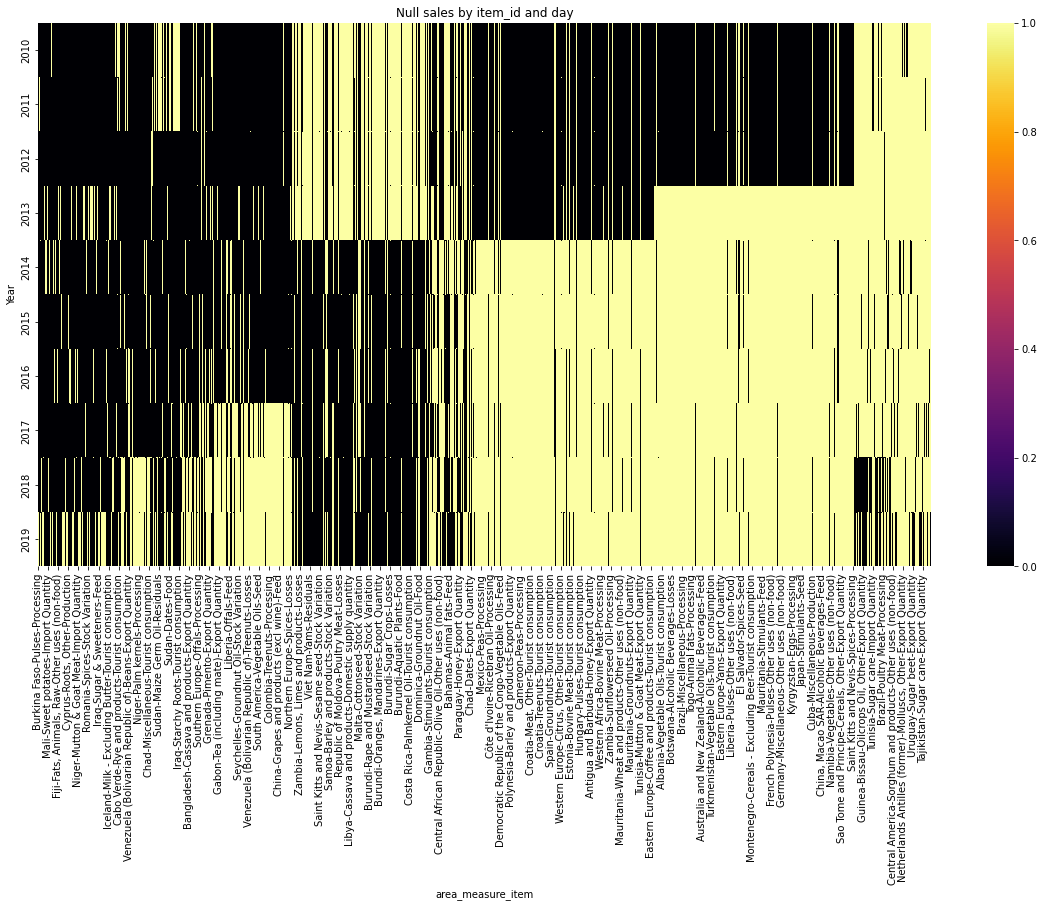

In [159]:
# create a smaller df
df_food_balances["area_measure_item"] = df_food_balances["Area"] + "-"+ df_food_balances["MeasuredItem"] 
short_df = df_food_balances[df_food_balances["Unit"]=="1000 tonnes"][["Year", "Value","area_measure_item"]]



gb_df_ = short_df.pivot_table(index = ["Year"], columns = ['area_measure_item'], values = "Value", aggfunc = sum).isnull()
display(gb_df_)
order_of_columns = list(gb_df_.sum()[(gb_df_.sum())>0].sort_values().index)

toRetrieveInfo =gb_df_.sum()[(gb_df_.sum())>0].index

display(len(order_of_columns))


display(len(toRetrieveInfo.unique()))

gb_df_ = gb_df_[order_of_columns]

plt.figure(figsize = (20, 10))
plot = sns.heatmap(gb_df_, cbar = True, cmap = "inferno")
plot.set_title("Null sales by item_id and day");


null_new_values = short_df[(short_df["area_measure_item"].isin(toRetrieveInfo))].groupby("area_measure_item").mean()
display(null_new_values[null_new_values["Value"]>0])

for x in toRetrieveInfo:
  display(short_df[short_df["area_measure_item"]==x])





In [ ]:
df = pd.read_csv(Database, encoding = "ISO-8859-1")

# DATA UNDERSTANDING

## Análisis de los datos

### Tamaño del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384700 entries, 0 to 17384699
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.4+ GB


### Visualización directa de los datos

In [ ]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,862,Alfalfa meal and pellets,5910,Export Quantity,2019,2019,tonnes,49.0,*
1,2,Afghanistan,862,Alfalfa meal and pellets,5910,Export Quantity,2020,2020,tonnes,21.0,*
2,2,Afghanistan,862,Alfalfa meal and pellets,5922,Export Value,2019,2019,1000 US$,18.0,*
3,2,Afghanistan,862,Alfalfa meal and pellets,5922,Export Value,2020,2020,1000 US$,8.0,*
4,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2014,2014,tonnes,167.0,R


Vemos que como en todas las bases, estan organizadas con la columnas de área corresponde a los países y probablemente a agrupaciones, los Items a priori son alimentos de cultivos y ganadería, según se informa en la FAO hay también agrupaciones, y para cada combinación de País-Item-Año tenemos, según se indica en la columna "Element", tanto la cantidad como el valor de producto importado y exportado.

Las variables, aunque están algunas cogidas como Numéricas, sólo hay dos columnas realmente numéricas, que son el año ("Year") y la columna "Value", ya que lo demás numéricas son identifiers (Area Code, Item Code, Element Code, Year Code, y Unit). El valor de cada columna define de qué se trata el valor numérico de la columna "Value".

Miramos la información que hay en la base de datos

**Area**

Contamos el número de Áreas?

In [ ]:
df["Area"].nunique()

276

Según la web de la FAO, las agrupaciones empiezan en el código 5000. Vemos qué agrupaciones hay.

In [ ]:
df[df["Area Code"]>5000]["Area"].unique()

array(['Africa', 'Africa (excluding intra-trade)', 'Eastern Africa',
       'Eastern Africa (excluding intra-trade)', 'Middle Africa',
       'Middle Africa (excluding intra-trade)', 'Northern Africa',
       'Northern Africa (excluding intra-trade)', 'Southern Africa',
       'Southern Africa (excluding intra-trade)', 'Western Africa',
       'Western Africa (excluding intra-trade)', 'Americas',
       'Americas (excluding intra-trade)', 'Northern America',
       'Northern America (excluding intra-trade)', 'Central America',
       'Central America (excluding intra-trade)', 'Caribbean',
       'Caribbean (excluding intra-trade)', 'South America',
       'South America (excluding intra-trade)', 'Asia',
       'Asia (excluding intra-trade)', 'Central Asia',
       'Central Asia (excluding intra-trade)', 'Eastern Asia',
       'Eastern Asia (excluding intra-trade)', 'Southern Asia',
       'Southern Asia (excluding intra-trade)', 'South-eastern Asia',
       'South-Eastern Asia (excludi

Vemos agrupaciones por continentes y otras agrupaciones de países, como los menos desarrolados, países sin litoral, países con deficit de comida, etc.

In [ ]:
## Hay también una agrupación de todo el mundo.

(df["Area"] == "World").sum()

109807

**Columna Element**

In [ ]:
df["Element"].unique()

array(['Export Quantity', 'Export Value', 'Import Quantity',
       'Import Value'], dtype=object)

Importaciones y exportaciones por cantidad de alimentos y por valor.

**Columna Item**

In [ ]:
df["Item"].unique()

array(['Alfalfa meal and pellets', 'Almonds shelled',
       'Almonds, with shell', 'Animals live nes',
       'Animals, live, non-food', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Apricots, dry', 'Areca nuts', 'Artichokes',
       'Asparagus', 'Avocados', 'Bacon and ham', 'Bambara beans',
       'Bananas', 'Barley', 'Beans, dry', 'Beans, green', 'Beehives',
       'Beer of barley', 'Beeswax', 'Beet pulp',
       'Beverages, distilled alcoholic', 'Beverages, fermented rice',
       'Beverages, non alcoholic', 'Blueberries', 'Bran, maize',
       'Bran, sorghum', 'Bran, wheat', 'Brazil nuts, shelled', 'Bread',
       'Broad beans, horse beans, dry', 'Buckwheat', 'Buffaloes',
       'Butter, cow milk', 'Buttermilk, curdled, acidified milk',
       'Cabbages and other brassicas', 'Cake, copra', 'Cake, cottonseed',
       'Cake, groundnuts', 'Cake, linseed', 'Cake, rapeseed',
       'Cake, soybeans', 'Cake, sunflower', 'Camels', 'Canary seed',
       'Carrots and tur

Sabemos, segun la web de FAOSTAT que hay códigos que son agrupaciones de alimentos. Y también según la web, los códigos de alimentos y agrupaciones están separados.

Lo comprobamos:

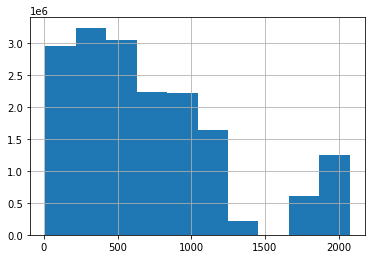

In [ ]:
df["Item Code"].hist()

Además, hay un Item que los agrupa a todos, que és el 10. 

Vemos este Item para el ejemplo de España.


In [ ]:
df[(df["Area"]=="Spain") & (df["Item Code"]==10) & (df["Year"]==df["Year"].max())].head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
10572313,203,Spain,10,Total Merchandise Trade,5622,Import Value,2020,2020,1000 US$,324993909.0,*
10572373,203,Spain,10,Total Merchandise Trade,5922,Export Value,2020,2020,1000 US$,307015020.0,*


Número total de Items, alimentos y agrupaciones.

In [ ]:
df["Item Code"].nunique()

476

In [ ]:
print("Tenemos un total de", df["Item Code"].nunique(), "Items, de los cuales, ", df[df["Item Code"].between(11,1500)==False]["Item Code"].nunique() , "son agrupaciones.")

Tenemos un total de 476 Items, de los cuales,  41 son agrupaciones.


Vemos un ejemplo de las agrupaciones.

In [ ]:
df[df["Item Code"]>1500].Item.unique()

array(['Agricultural Products', 'Cereals and Preparations', 'Cereals',
       'Food Excluding Fish', 'Cereal preparations',
       'Fats and Oils (excluding Butter)',
       'Animal Fats and Oils (excl. Butter)', 'Vegetable Oil and Fat',
       'Meat and Meat Preparations', 'Bovine Meat', 'Poultry Meat',
       'Pigmeat', 'Other Meat', 'Sugar and Honey', 'Fruit and Vegetables',
       'Fruit', 'Vegetables', 'Pulses', 'Roots and Tubers', 'Nuts',
       'Sugar Crops Primary', 'Dairy Products and Eggs', 'Dairy Products',
       'Eggs', 'Beverages', 'Alcoholic Beverages',
       'Non-alcoholic Beverages', 'Other food', 'Live Animals',
       'Oilseeds', 'Other food nes', 'Non-food',
       'Fodder and Feeding Stuff', 'Non-edible Crude Materials',
       'Natural Rubber', 'Textile Fibres', 'Hides and skins',
       'Crude Materials nes', 'Non-edible Fats and Oils', 'Tobacco'],
      dtype=object)

### Resumen
Vemos que la base de datos tiene información por pais y alimento, de la cantidad y valor exportado i importado.
- A parte de los países, hay varias agrupaciones de países como continentes u otras agrupaciones.
- Los alimentos también están agrupados en deiversas categorías, que se solapan entre ellas.
- Se analizarán cuales son los alimentos más exportados/importados y también los países que más alimentos exportan e importan.
- También se mostrará la evolución de las importaciones de alimentos en general, i por países más importadores.


### Miramos si hay nulos o duplicados

In [ ]:
df.isnull().sum()

Area Code             0
Area                  0
Item Code             0
Item                  0
Element Code          0
Element               0
Year Code             0
Year                  0
Unit                  0
Value           2947019
Flag            6924546
dtype: int64

De los 17 millones y pico de registros, tenemos unos casi 3 millones de nulos el la columna "Value", que es donde hay la información de esta base.
Intentamos analizar de qué se tratan estos nulos.

En el "Flag" también hay nulos, pero no es una columna que a priori vayamo a usar.

In [ ]:
df[ df["Value"].isnull()].head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
141,2,Afghanistan,221,"Almonds, with shell",5610,Import Quantity,2017,2017,tonnes,NaN,NaN
148,2,Afghanistan,221,"Almonds, with shell",5622,Import Value,2017,2017,1000 US$,NaN,NaN
275,2,Afghanistan,1171,Animals live nes,5622,Import Value,2017,2017,1000 US$,NaN,NaN
280,2,Afghanistan,1171,Animals live nes,5922,Export Value,2017,2017,1000 US$,NaN,NaN
287,2,Afghanistan,1169,"Animals, live, non-food",5622,Import Value,2017,2017,1000 US$,NaN,NaN


Miramos los nulos por países.

Países con menos nulos

In [ ]:
df.groupby(["Area Code", "Area"])["Value"].apply(lambda x: x.isnull().sum()).sort_values().head(40)

Area Code  Area                                                           
261        European Union (12) (excluding intra-trade)                          0
266        European Union (15) (excluding intra-trade)                          0
268        European Union (25) (excluding intra-trade)                          0
57070      European Union (27) (excluding intra-trade)                          0
269        European Union (27) (excluding Croatia) (excluding intra-trade)      0
54040      Western Europe (excluding intra-trade)                               0
54020      Northern Europe (excluding intra-trade)                              0
57060      European Union (28) (excluding intra-trade)                          6
55040      Polynesia (excluding intra-trade)                                   13
55010      Australia and New Zealand (excluding intra-trade)                   18
54030      Southern Europe (excluding intra-trade)                             26
55000      Oceania (exc

La mayoría com pocos nulos son agrupaciones. Tiene sentido. Se podría analizar la evolución de los nulos en el tiempo. Hay quizás años en los que no hay valores? 


Países con más nulos

In [ ]:
df.groupby(["Area Code", "Area"])["Value"].apply(lambda x: x.isnull().sum()).sort_values().tail(20)

Area Code  Area                       
8          Antigua and Barbuda            27256
173        Poland                         27882
299        Palestine                      28045
153        New Caledonia                  28437
215        United Republic of Tanzania    28667
249        Yemen                          28795
141        Mongolia                       29493
13         Bahrain                        30466
91         Guyana                         30485
115        Cambodia                       30562
75         Gambia                         30968
179        Qatar                          32795
226        Uganda                         33224
184        Rwanda                         33871
225        United Arab Emirates           34431
149        Nepal                          34848
81         Ghana                          36871
209        Eswatini                       39228
3          Albania                        43765
147        Namibia                        52689
N

Analizamos los Nulos por año

In [ ]:
nulos = df.groupby(["Year"])["Value"].apply(lambda x: x.isnull().sum())

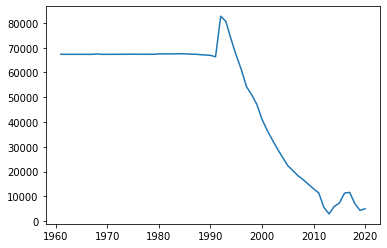

In [ ]:
plt.plot(nulos)

- Los nulos están concentrados en los años más anteriores. 
- Hay un salto extraño cerca de 1992. ¿Puede que se incluyeran nuevos alimentos? 



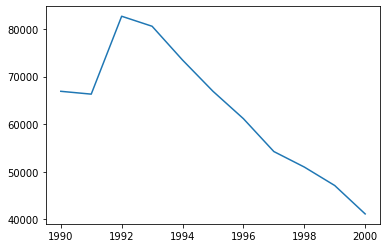

In [ ]:
## Hacemos zoom en los años cercanos al 1992

plt.plot(nulos.loc[1990:2000])

Efectivamente hay un cambio en el 1992

In [ ]:
df[df.Year == 1991]["Item"].nunique()

473

In [ ]:
df[df.Year == 1992]["Item"].nunique()

473

In [ ]:
df[df.Year == 1991]["Area"].nunique()

238

In [ ]:
df[df.Year == 1992]["Area"].nunique()

258

Pero si hay más paises. Quizás los nuevos países tienen muchos nulos.. Se podría seguir analizando...

In [ ]:
df[df.Year == 1991].shape

(288020, 11)

In [ ]:
df[df.Year == 1992].shape

(314377, 11)

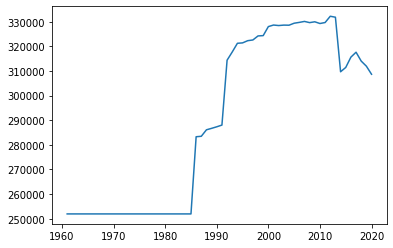

In [ ]:
plt.plot(df.groupby("Year")["Value"].apply(lambda x:len(x)))

Vemos que hay un salto en el número de registros.... así pues, podría ser  que ese salto en los nulos sea debido a que se ha cambiado la forma en la que se guardan los datos.

De todos modos, en los últimos años vemos una reducción importante de los nulos mientras que el total de registros no tiene una reducción progresiva.

Miramos en los últimos años, en qué paises están repartidos los nulos.

In [ ]:
df_ult_año_paises = df[(df.Year == 2020) & (df["Area Code"]<5000)]
df_ult_año_paises.groupby(["Area Code", "Area"])["Value"].apply(lambda x: x.isnull().sum()).sort_values(ascending=False).head(40)

Area Code  Area                
136        Mauritania              247
35         Cabo Verde              240
233        Burkina Faso            225
58         Ecuador                 186
170        Peru                    182
40         Chile                   171
194        Saudi Arabia            167
225        United Arab Emirates    165
46         Congo                   153
53         Benin                   146
196        Seychelles              145
169        Paraguay                142
45         Comoros                 140
158        Niger                   132
143        Morocco                 130
129        Madagascar              121
209        Eswatini                119
48         Costa Rica              115
118        Kuwait                  115
56         Dominican Republic      107
26         Brunei Darussalam       103
144        Mozambique              101
130        Malawi                   98
108        Kazakhstan               97
185        Russian Federation   

Observamos que hay mayor concentración de nulos en países de África y Suramérica. No aparecen países de Europa o Norteamérica. 

In [ ]:
#Observamos los nulos de "Saudi Arabia"

df[(df.Year == 2020) & (df["Area Code"]==194) & (df["Value"].isnull())].head(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
9833498,194,Saudi Arabia,1171,Animals live nes,5622,Import Value,2020,2020,1000 US$,NaN,NaN
9834640,194,Saudi Arabia,226,Areca nuts,5910,Export Quantity,2020,2020,tonnes,NaN,NaN
9834642,194,Saudi Arabia,226,Areca nuts,5922,Export Value,2020,2020,1000 US$,NaN,NaN
9835554,194,Saudi Arabia,1039,Bacon and ham,5610,Import Quantity,2020,2020,tonnes,NaN,NaN
9835557,194,Saudi Arabia,1039,Bacon and ham,5622,Import Value,2020,2020,1000 US$,NaN,NaN
9836099,194,Saudi Arabia,44,Barley,5910,Export Quantity,2020,2020,tonnes,NaN,NaN
9836155,194,Saudi Arabia,44,Barley,5922,Export Value,2020,2020,1000 US$,NaN,NaN
9836211,194,Saudi Arabia,46,"Barley, pearled",5610,Import Quantity,2020,2020,tonnes,NaN,NaN
9836267,194,Saudi Arabia,46,"Barley, pearled",5622,Import Value,2020,2020,1000 US$,NaN,NaN
9837138,194,Saudi Arabia,51,Beer of barley,5610,Import Quantity,2020,2020,tonnes,NaN,NaN


In [ ]:
# Quizás los nulos equivalen a 0. Miramos la evolucion temporal de algunos de los alimentos con nulos de Arabia Saudi. 
# Por ejemplo las importaciones (Elemento 5622) de Cider (código 517)

df[(df.Year.between(1990,2020)) & (df["Area Code"]==194) & (df["Item Code"] == 517) & (df["Element Code"]==5622)].tail(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
9847587,194,Saudi Arabia,517,Cider etc,5622,Import Value,1997,1997,1000 US$,0.0,F
9847588,194,Saudi Arabia,517,Cider etc,5622,Import Value,1998,1998,1000 US$,0.0,F
9847589,194,Saudi Arabia,517,Cider etc,5622,Import Value,1999,1999,1000 US$,0.0,F
9847590,194,Saudi Arabia,517,Cider etc,5622,Import Value,2000,2000,1000 US$,0.0,NaN
9847591,194,Saudi Arabia,517,Cider etc,5622,Import Value,2001,2001,1000 US$,0.0,NaN
9847592,194,Saudi Arabia,517,Cider etc,5622,Import Value,2002,2002,1000 US$,0.0,F
9847593,194,Saudi Arabia,517,Cider etc,5622,Import Value,2003,2003,1000 US$,31.0,R
9847594,194,Saudi Arabia,517,Cider etc,5622,Import Value,2004,2004,1000 US$,73.0,R
9847595,194,Saudi Arabia,517,Cider etc,5622,Import Value,2005,2005,1000 US$,0.0,*
9847596,194,Saudi Arabia,517,Cider etc,5622,Import Value,2006,2006,1000 US$,0.0,F


En este caso, vemos que en años anteriores habían 0's y luego ha pasado a nulos. Es probable que los nulos representen 0.

Miramos algun otro ejemplo

In [ ]:
#Observamos los nulos de "Mauritania"

df[(df.Year == 2020) & (df["Area Code"]==136) & (df["Value"].isnull())].head(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
7192517,136,Mauritania,231,Almonds shelled,5610,Import Quantity,2020,2020,tonnes,NaN,NaN
7192573,136,Mauritania,231,Almonds shelled,5622,Import Value,2020,2020,1000 US$,NaN,NaN
7192848,136,Mauritania,1169,"Animals, live, non-food",5922,Export Value,2020,2020,1000 US$,NaN,NaN
7192904,136,Mauritania,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2020,2020,tonnes,NaN,NaN
7192960,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2020,2020,1000 US$,NaN,NaN
7193136,136,Mauritania,526,Apricots,5610,Import Quantity,2020,2020,tonnes,NaN,NaN
7193192,136,Mauritania,526,Apricots,5622,Import Value,2020,2020,1000 US$,NaN,NaN
7193248,136,Mauritania,527,"Apricots, dry",5610,Import Quantity,2020,2020,tonnes,NaN,NaN
7193251,136,Mauritania,527,"Apricots, dry",5622,Import Value,2020,2020,1000 US$,NaN,NaN
7193641,136,Mauritania,1039,Bacon and ham,5610,Import Quantity,2020,2020,tonnes,NaN,NaN


In [ ]:
# Observamos ahora la evolución de uno de los Items con nulos

df[(df.Year.between(1990,2020)) & (df["Area Code"]==136) & (df["Item Code"] == 711) & (df["Element Code"]==5622)].tail(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
7192941,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,1997,1997,1000 US$,NaN,M
7192942,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,1998,1998,1000 US$,NaN,M
7192943,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,1999,1999,1000 US$,NaN,M
7192944,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2000,2000,1000 US$,NaN,M
7192945,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2001,2001,1000 US$,NaN,M
7192946,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2002,2002,1000 US$,NaN,M
7192947,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2003,2003,1000 US$,NaN,M
7192948,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2004,2004,1000 US$,NaN,M
7192949,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2005,2005,1000 US$,NaN,M
7192950,136,Mauritania,711,"Anise, badian, fennel, coriander",5622,Import Value,2006,2006,1000 US$,NaN,M


En este caso también podría ser buena opción poner 0's. 
Parece que en los casos con nulos, se repiten Nulos y 0's en otros años. Quizás una buena estrategia sería rellenar los Nulos con 0's, y más teniendo en cuenta que en caso de tener información del país con el que se hace una transacción, los campos ya se rellenan con esa información.

# EDA

### Vamos a ver cuales han sido los países  más exportadores el último año.
Tenemos en cuenta lo siguiente:
- Las agrupaciones de paises están en los códigos mayores de 5000
- Las agrupaciones de productos están en los códigos mayores de 1500

In [ ]:
ult_año = df["Year"].max()

In [ ]:
# Filtramos la base de datos para quedarnos la cantidad exportada de alimentos (no agrupaciones), por países (no agrupaciones) en el último año.

df_Paises_Export_q_2020 = df[ (df["Element"] == "Export Quantity") & (df["Area Code"] < 5000) & (df["Year"] == ult_año ) & (df["Item Code"] < 1500 )]

In [ ]:
df_Paises_Export_q_2020.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1,2,Afghanistan,862,Alfalfa meal and pellets,5910,Export Quantity,2020,2020,tonnes,21.0,*
77,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,2020,2020,tonnes,4123.0,R
211,2,Afghanistan,221,"Almonds, with shell",5910,Export Quantity,2020,2020,tonnes,2546.0,*
371,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,2020,2020,tonnes,15176.0,R
611,2,Afghanistan,515,Apples,5910,Export Quantity,2020,2020,tonnes,29776.0,R


In [ ]:
# Agrupamos por país y sumamos todas las cantidades exportadas

gb_df_Paises_Export_q_2020 = df_Paises_Export_q_2020.groupby(["Year","Area","Element"])["Value"].sum().reset_index()

In [ ]:
tabla_orden=gb_df_Paises_Export_q_2020.sort_values("Value", ascending=True).tail(20).reset_index(drop=True)

In [ ]:
tabla_orden.head()

,Year,Area,Element,Value
0,2020,Malaysia,Export Quantity,26937042.0
1,2020,Poland,Export Quantity,27748419.0
2,2020,Australia,Export Quantity,31572071.0
3,2020,China (excluding intra-trade),Export Quantity,32719976.0
4,2020,Belgium,Export Quantity,36037663.0


In [ ]:
fig = px.bar(tabla_orden, 
             x="Value", y="Area", title='Cantidad Total Exportada en Toneladas el 2020', text='Value', orientation='h', 
             width=700, height=700, range_x = [0, max(gb_df_Paises_Export_q_2020['Value'])+50000000])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')

Países más exportadores de alimentos: USA y Brasil con diferencia. China, aunque es probablemente el país más exportador del mundo, no es un gran exportador de alimentos. 

### Vamos a ver ahora los países  más importadores en el último año.
Tenemos en cuenta lo siguiente:
- Las agrupaciones de paises están en los códigos mayores de 5000
- Las agrupaciones de productos están en los códigos mayores de 1500

In [ ]:
df_Paises_Import_q_2020 = df[ (df["Element"] == "Import Quantity") & (df["Area Code"] < 5000) & (df["Year"] == ult_año ) & (df["Item Code"] < 1500 )]

gb_df_Paises_Import_q_2020 = df_Paises_Import_q_2020.groupby(["Year","Area","Element"])["Value"].sum().reset_index()

tabla_orden=gb_df_Paises_Import_q_2020.sort_values("Value", ascending=True).tail(20).reset_index(drop=True)

In [ ]:
fig = px.bar(tabla_orden, 
             x="Value", y="Area", title='Cantidad Total Importada en Toneladas el 2020', text='Value', orientation='h', 
             width=700, height=700, range_x = [0, max(gb_df_Paises_Import_q_2020['Value'])+150000000])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')

### Evolución de las importaciones y exportaciones por países más exportadores e importadores.

#### Países más exportadores

In [ ]:
# Paises más exportadores
top_paises_exp = gb_df_Paises_Export_q_2020.sort_values("Value").tail(20)["Area"].to_list()


In [ ]:
df_Paises_Export_q = df[ (df["Element"] == "Export Quantity") & (df["Area"].isin(top_paises_exp)) & (df["Item Code"] < 1500 )]

In [ ]:
#GRAFICO EVOLUTIVO HORIZONTAL DE LOS CASOS DEL COVID POR PAIS Y FECHA
grafico_horizontal = df_Paises_Export_q.groupby(['Area', 'Year'])['Value'].sum().reset_index()

evolucion_horizontal = px.bar(grafico_horizontal, x="Year", y="Value", color='Area', orientation='v', height=500,
             title='Toneladas Exportadas por Año', color_discrete_sequence = px.colors.cyclical.mygbm)

evolucion_horizontal.show()

- Estados Unidos es el país más exportador de cultivos y productos de ramadería en los últimos 60 años
- Brasil es el país que más ha aumentado su exportación, con una tendencia a superar EEUU en los próximos años.
- Argentina tambíen ha pasado a ser un gran exportador en los últimos 20 años
- los demás paises se mantienen bastante estables en los últimos años.

In [ ]:
# Grafico evolutivo de lineas, no barras apiladas.

evolutivo_lineas = df_Paises_Export_q.groupby(['Area', 'Year'])['Value'].sum().reset_index().sort_values('Year', ascending=True)
#data.groupby(['Fecha', 'Pais'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

px.line(evolutivo_lineas, x="Year", y="Value", color='Area', title='Evolutivo', height=500)

Aquí podemos observar que aunque no en una gran proporción, todos los países han tenido unta tendencia a la alza en las exportaciones.

Entre los destacados según la tendencia alcista, a parte de Brasil (el que más crece), EEUU y Argentina, encontramos países como Canadá  o Rusia.

Qué exportan Brasil, Estados Unidos y Argentina?

In [ ]:
top3_paises_exp = gb_df_Paises_Export_q_2020.sort_values("Value").tail(3)["Area"].to_list()
top3_paises_exp

['Argentina', 'Brazil', 'United States of America']

In [ ]:
df_USA = df[ (df["Element"] == "Export Quantity") & (df["Area"] == 'United States of America') & (df["Year"] == ult_año ) & (df["Item Code"] < 1500 )].sort_values("Value", ascending=False).head(10)
df_USA

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
12028495,231,United States of America,236,Soybeans,5910,Export Quantity,2020,2020,tonnes,64571021.0,NaN
11998373,231,United States of America,56,Maize,5910,Export Quantity,2020,2020,tonnes,51838933.0,NaN
12038927,231,United States of America,15,Wheat,5910,Export Quantity,2020,2020,tonnes,26131626.0,NaN
11976836,231,United States of America,654,"Dregs from brewing, distillation",5910,Export Quantity,2020,2020,tonnes,10958614.0,NaN
11964254,231,United States of America,238,"Cake, soybeans",5910,Export Quantity,2020,2020,tonnes,10044220.0,NaN
12028015,231,United States of America,83,Sorghum,5910,Export Quantity,2020,2020,tonnes,6586580.0,NaN
11985206,231,United States of America,651,Forage products,5910,Export Quantity,2020,2020,tonnes,4708311.0,NaN
11974210,231,United States of America,767,Cotton lint,5910,Export Quantity,2020,2020,tonnes,3822303.0,NaN
12001705,231,United States of America,1058,"Meat, chicken",5910,Export Quantity,2020,2020,tonnes,3546799.0,NaN
12025149,231,United States of America,30,"Rice, paddy (rice milled equivalent)",5910,Export Quantity,2020,2020,tonnes,2791901.0,A


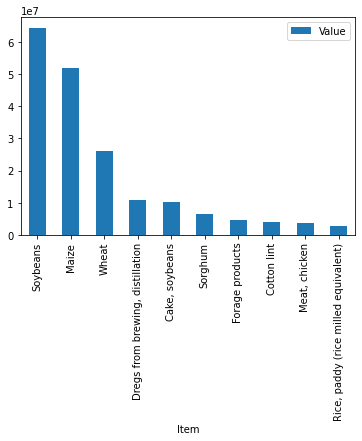

In [ ]:
df_USA.plot(x="Item", y="Value",kind="bar")

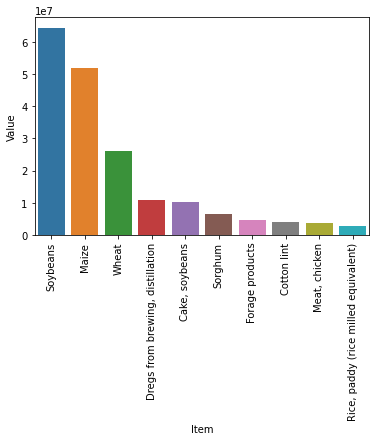

In [ ]:
ax = sns.barplot(data=df_USA, x="Item", y="Value")
b = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)   #  si no lo igualo a alguna variable, me aparece una llista sobre el gráfico.

In [ ]:
df_BRA = df[ (df["Element"] == "Export Quantity") & (df["Area"] == 'Brazil') & (df["Year"] == ult_año ) & (df["Item Code"] < 1500 )].sort_values("Value", ascending=False).head(10)
df_BRA

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1472409,21,Brazil,236,Soybeans,5910,Export Quantity,2020,2020,tonnes,82973413.0,NaN
1444042,21,Brazil,56,Maize,5910,Export Quantity,2020,2020,tonnes,34431936.0,NaN
1474413,21,Brazil,162,Sugar Raw Centrifugal,5910,Export Quantity,2020,2020,tonnes,26675030.0,NaN
1411975,21,Brazil,238,"Cake, soybeans",5910,Export Quantity,2020,2020,tonnes,16937916.0,NaN
1474653,21,Brazil,164,Sugar refined,5910,Export Quantity,2020,2020,tonnes,3960898.0,Im
1446886,21,Brazil,1058,"Meat, chicken",5910,Export Quantity,2020,2020,tonnes,3899503.0,NaN
1420209,21,Brazil,656,"Coffee, green",5910,Export Quantity,2020,2020,tonnes,2372633.0,Im
1421479,21,Brazil,767,Cotton lint,5910,Export Quantity,2020,2020,tonnes,2125418.0,NaN
1446646,21,Brazil,870,"Meat, cattle, boneless (beef & veal)",5910,Export Quantity,2020,2020,tonnes,1715557.0,NaN
1440600,21,Brazil,491,"Juice, orange, single strength",5910,Export Quantity,2020,2020,tonnes,1323301.0,NaN


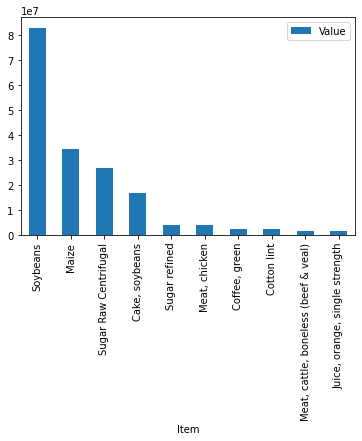

In [ ]:
df_BRA.plot(x="Item", y="Value",kind="bar")

#### Países más importadores

In [ ]:

top_paises_imp = gb_df_Paises_Import_q_2020.sort_values("Value").tail(20)["Area"].to_list()

df_Paises_Import_q = df[ (df["Element"] == "Import Quantity") & (df["Area"].isin(top_paises_imp)) & (df["Item Code"] < 1500 )]

# Grafico evolutivo de lineas, no barras apiladas.

evolutivo_lineas = df_Paises_Import_q.groupby(['Area', 'Year'])['Value'].sum().reset_index().sort_values('Year', ascending=True)
#data.groupby(['Fecha', 'Pais'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

px.line(evolutivo_lineas, x="Year", y="Value", color='Area', title='Evolutivo', height=500)

Vemos China aumentando las importaciones a una velocidad sin precedentes probablemente en consonancia al augmento del poder adquisitivo de la población y aumento de la clase media-alta!! También destaca Myanmar como dato anecdótico.

### Qué importa China?? Evolución.

In [ ]:
[x for x in list(df["Area"].drop_duplicates()) if "China" in x]

['China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'China (excluding intra-trade)']

In [ ]:
df_CHI = df[ (df["Element"] == "Import Quantity") & (df["Area"] == 'China (excluding intra-trade)') & (df["Year"] == ult_año ) & (df["Item Code"] < 1500 )].sort_values("Value", ascending=False).head(10)


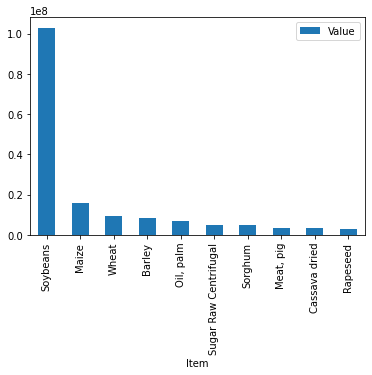

In [ ]:
df_CHI.plot(x="Item", y="Value",kind="bar")

### Producto más exportado a nivel mundial

In [ ]:
gb_df_Item_Export_q_2020 = df_Paises_Export_q_2020.groupby(["Year","Item","Element"])["Value"].sum().reset_index()

In [ ]:
tabla_orden = gb_df_Item_Export_q_2020.sort_values("Value", ascending=True).tail(20)
fig = px.bar(tabla_orden, 
             x="Value", y="Item", title='Cantidad Total Exportada en Toneladas el 2020 por alimento', text='Value', orientation='h', 
             width=700, height=700, range_x = [0, max(tabla_orden['Value'])+100000000])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')


Los productos más exportados son: Trigo, Maiz y soja.

In [ ]:
gb_df_Item_Export_q_2020.sort_values("Value", ascending=False).head(5)

,Year,Item,Element,Value
380,2020,Wheat,Export Quantity,198526653.0
200,2020,Maize,Export Quantity,192896519.0
335,2020,Soybeans,Export Quantity,173523856.0
49,2020,"Cake, soybeans",Export Quantity,68264630.0
294,2020,Pigs,Export Quantity,48704535.0


### Producto más importado a nivel mundial

In [ ]:
gb_df_Item_Import_q_2020 = df_Paises_Import_q_2020.groupby(["Year","Item","Element"])["Value"].sum().reset_index()

In [ ]:
gb_df_Item_Import_q_2020.sort_values("Value", ascending=False).head(20)

,Year,Item,Element,Value
336,2020,Soybeans,Import Quantity,372929173.0
379,2020,"Waters,ice etc",Import Quantity,217540334.0
201,2020,Maize,Import Quantity,216715155.0
381,2020,Wheat,Import Quantity,211923818.0
320,2020,"Rodents, other",Import Quantity,70154904.0
50,2020,"Cake, soybeans",Import Quantity,67379574.0
268,2020,"Oil, palm",Import Quantity,60927212.0
342,2020,Sugar Raw Centrifugal,Import Quantity,49552257.0
15,2020,Barley,Import Quantity,49103094.0
319,2020,"Rice, paddy (rice milled equivalent)",Import Quantity,48622805.0


No acabo de entender porque el Item "Waters, Ice etc" aparece en la tabla de productos más importados pero no en la de más exportados....

### Podríamos seguir analizando, y ver la evolución de las exportaciones e importaciones por alimentos.